# CREDIT EDA ASSIGNMENT


## importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### reading the csv files

In [2]:
new_application = pd.read_csv("file:///C:/Users/umesh/Downloads/application_data.csv")
past_application = pd.read_csv("file:///C:/Users/umesh/Downloads/previous_application.csv")

In [3]:
new_application.head()



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
past_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
new_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
new_application.shape

(307511, 122)

In [7]:
past_application.shape

(1670214, 37)

## findind the common variable in both the data set so we get to know if merging is required, how can we merege

In [8]:
common_variable = []
new_variable = []
for column in new_application.columns:
    if column in past_application.columns:
        common_variable.append(column)
    else:
        new_variable.append(column)
print("common variable  ",common_variable)

print("new variable  " ,new_variable)
print(len(common_variable))

print(len(new_variable))
## we come to know if merging is required we can merege on SK_ID_CURR

common variable   ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']
new variable   ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_

if merging required we can merge on SK_ID_CURR

#### %of missing values 


In [11]:
new_application.isna().mean()
null = new_application.isna().sum()/len(null)*100
null[null>35]
col_to_drop = null[null>35].keys()
len(col_to_drop)

64

#### dropping the columns having missing data more than 35%

In [12]:
## percent of null values, and dropping them if the % is more than 30
new_application.drop(col_to_drop, axis = 1, inplace = True)


In [13]:
new_application.head()
new_application.shape

(307511, 58)

In [14]:
new_application.isna().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [15]:
# Categorical columns

category =list(set(new_application.columns) - set(new_application.describe().columns))
numeric = list(set(new_application.describe().columns))

In [16]:
print("category",category)
print("numeric",numeric)

category ['NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'FLAG_OWN_CAR', 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE']
numeric ['REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_18', 'REGION_RATING_CLIENT', 'FLAG_CONT_MOBILE', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'TARGET', 'FLAG_DOCUMENT_21', 'AMT_INCOME_TOTAL', 'FLAG_DOCUMENT_9', 'DAYS_BIRTH', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_20', 'HOUR_APPR_PROCESS_START', 'FLAG_DOCUMENT_15', 'REG_CITY_NOT_LIVE_CITY', 'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_19', 'FLAG_PHONE', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_17', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'FLAG_MOBIL', 'FLAG_DOCUMENT_10', 'SK_ID_CURR', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'DAYS_ID_PUBLISH', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_16', 'REG_REGION_NOT_LIVE_REGION

box plot of REG_CITY_NOT_WORK_CITY


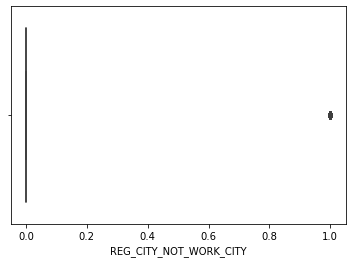

box plot of FLAG_DOCUMENT_18


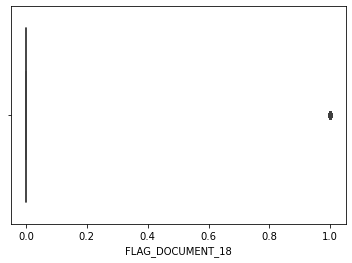

box plot of REGION_RATING_CLIENT


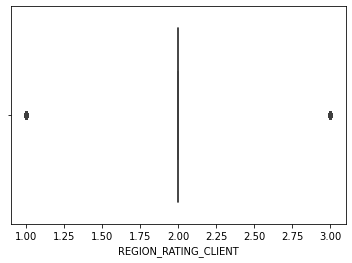

box plot of FLAG_CONT_MOBILE


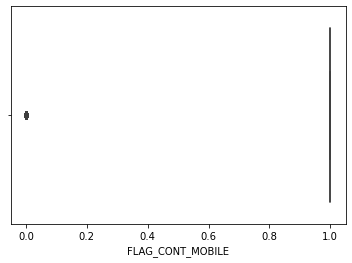

box plot of REGION_RATING_CLIENT_W_CITY


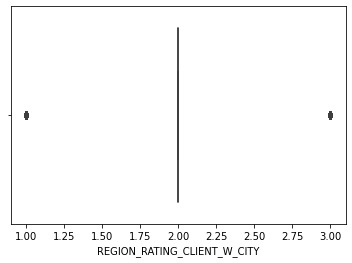

box plot of DAYS_LAST_PHONE_CHANGE


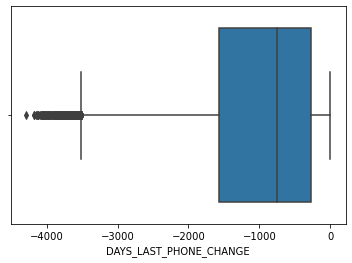

box plot of TARGET


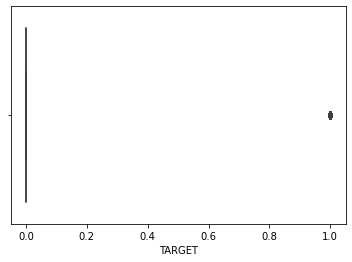

box plot of FLAG_DOCUMENT_21


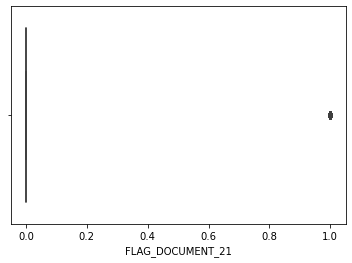

box plot of AMT_INCOME_TOTAL


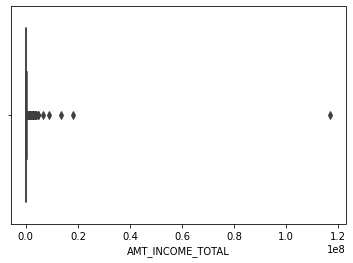

box plot of FLAG_DOCUMENT_9


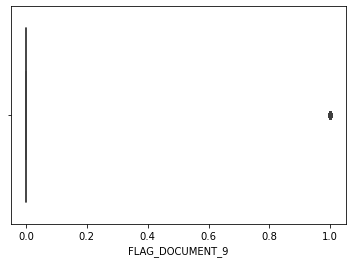

box plot of DAYS_BIRTH


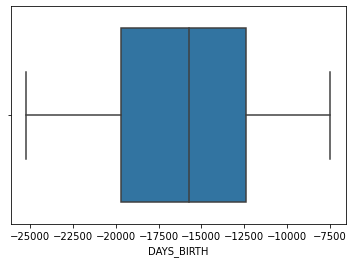

box plot of FLAG_DOCUMENT_13


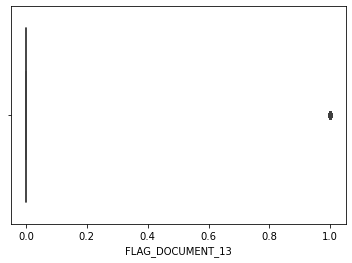

box plot of FLAG_DOCUMENT_20


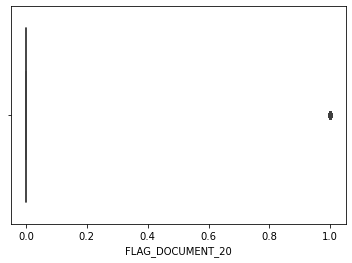

box plot of HOUR_APPR_PROCESS_START


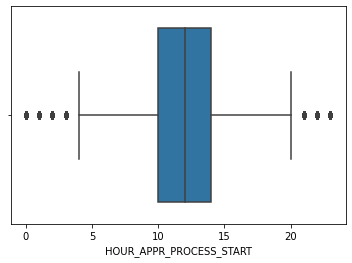

box plot of FLAG_DOCUMENT_15


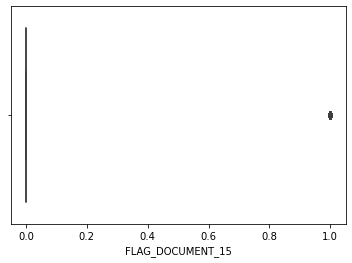

box plot of REG_CITY_NOT_LIVE_CITY


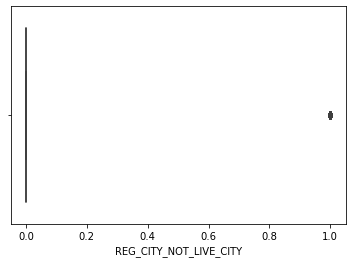

box plot of REGION_POPULATION_RELATIVE


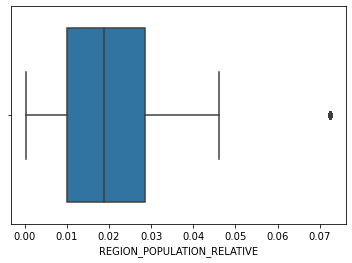

box plot of FLAG_EMP_PHONE


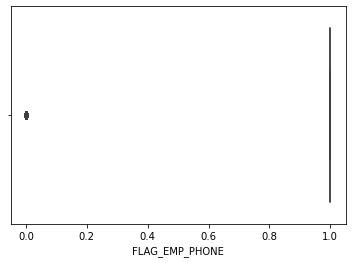

box plot of LIVE_CITY_NOT_WORK_CITY


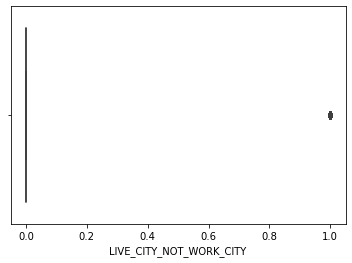

box plot of FLAG_DOCUMENT_19


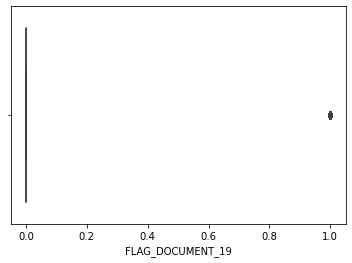

box plot of FLAG_PHONE


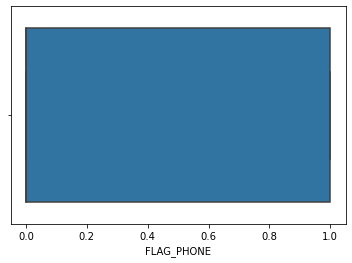

box plot of REG_REGION_NOT_WORK_REGION


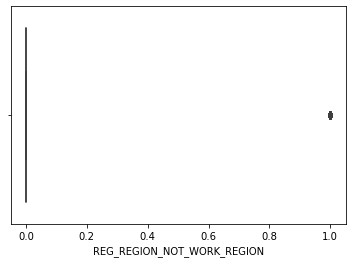

box plot of FLAG_DOCUMENT_17


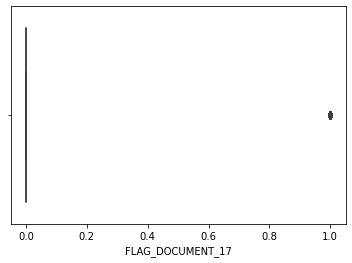

box plot of FLAG_EMAIL


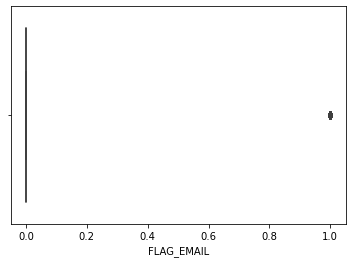

box plot of CNT_FAM_MEMBERS


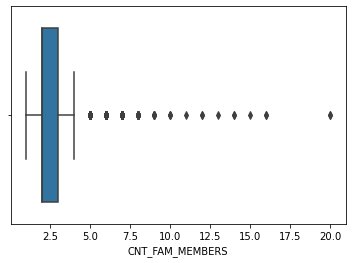

box plot of AMT_CREDIT


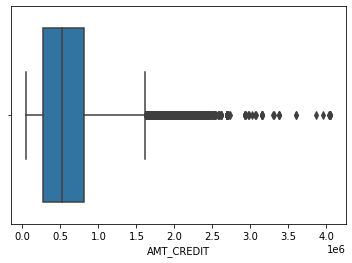

box plot of FLAG_MOBIL


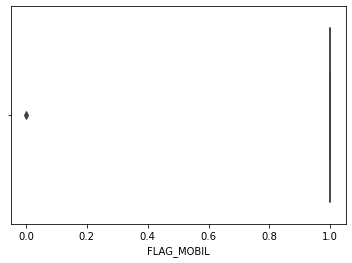

box plot of FLAG_DOCUMENT_10


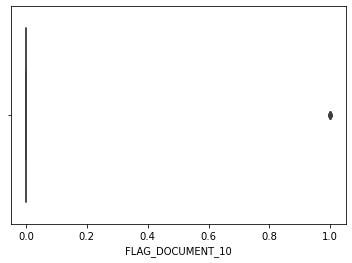

box plot of SK_ID_CURR


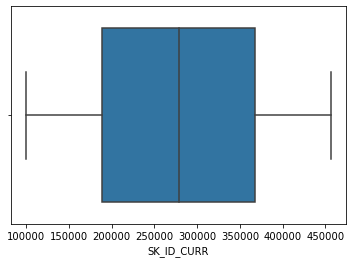

box plot of FLAG_DOCUMENT_4


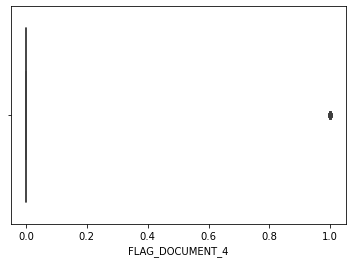

box plot of FLAG_DOCUMENT_11


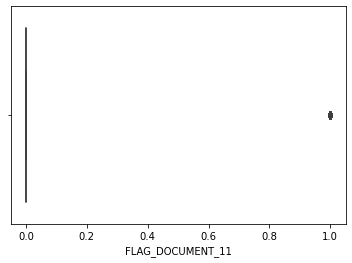

box plot of FLAG_DOCUMENT_12


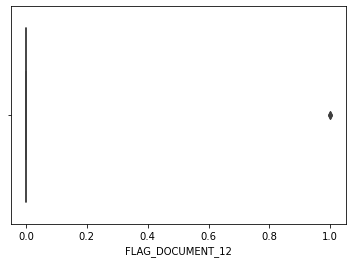

box plot of DAYS_ID_PUBLISH


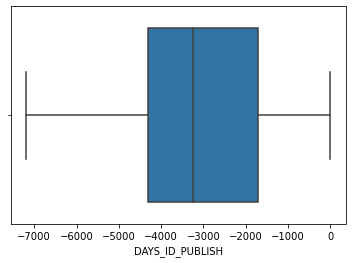

box plot of LIVE_REGION_NOT_WORK_REGION


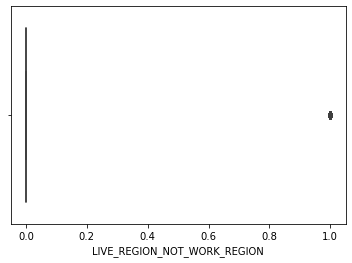

box plot of FLAG_DOCUMENT_5


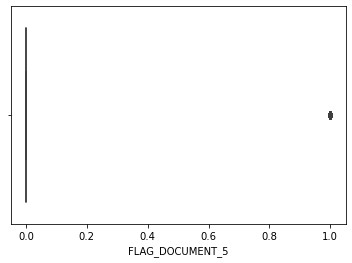

box plot of FLAG_DOCUMENT_16


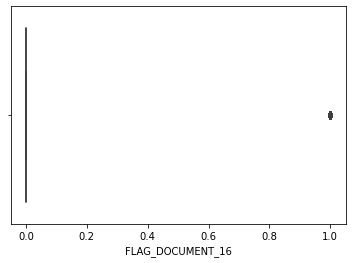

box plot of REG_REGION_NOT_LIVE_REGION


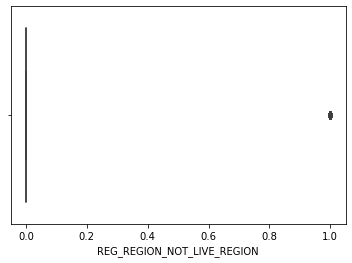

box plot of FLAG_DOCUMENT_3


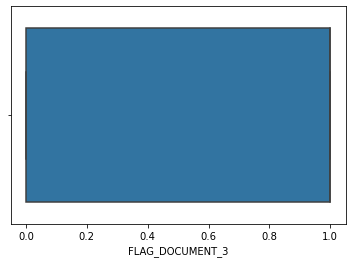

box plot of CNT_CHILDREN


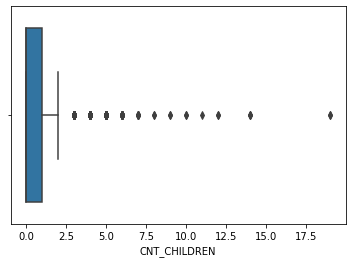

box plot of DAYS_EMPLOYED


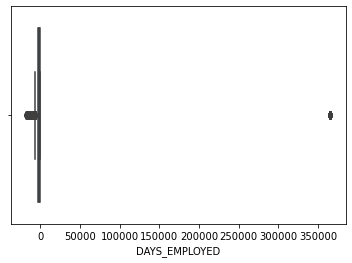

box plot of FLAG_DOCUMENT_2


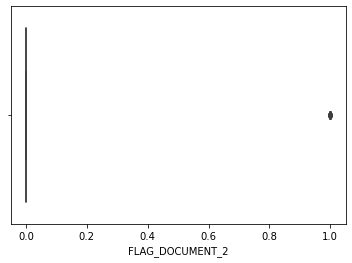

box plot of FLAG_DOCUMENT_6


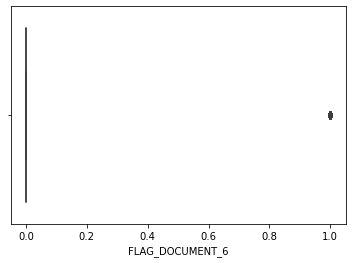

box plot of DAYS_REGISTRATION


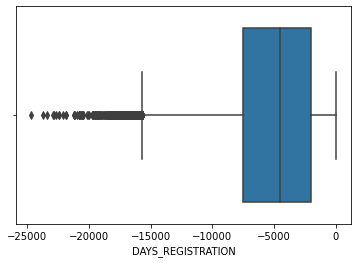

box plot of FLAG_WORK_PHONE


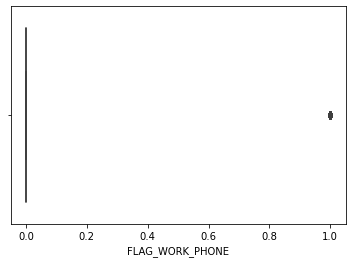

box plot of FLAG_DOCUMENT_14


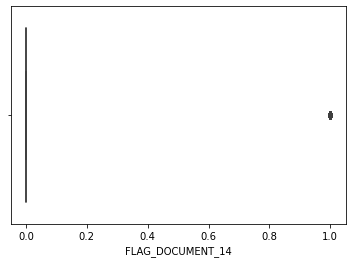

box plot of FLAG_DOCUMENT_8


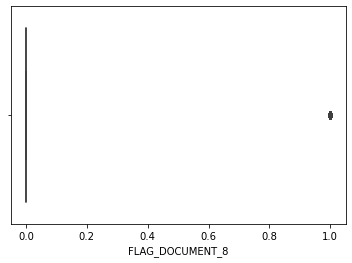

box plot of FLAG_DOCUMENT_7


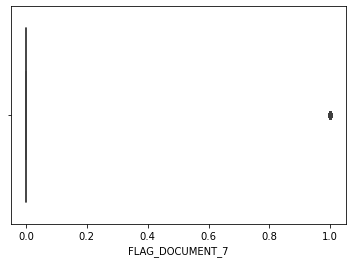

box plot of AMT_ANNUITY


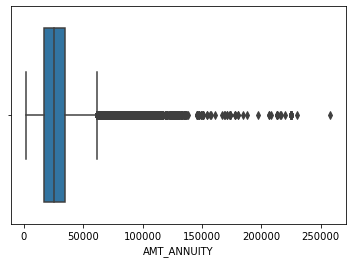

In [17]:
### box plotiing to find the outliesrs and also get help to get the ranges for numerical and continous variable
for i in numeric:
    
    print("box plot of", i)
    sns.boxplot(new_application[i])
    
    plt.show()
    

Few points can be concluded from the graphs above for target_0.

#Some outliers are noticed in credit amount.

#Some outliers are noticed in annuity amount.


#Some outliers are noticed in income amount.


In [18]:
new_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count  3.075110e+05  307499.000000               307511.000000  307511.000000   
mean   5.990260e+05   27108.573909                    0.020868  -16036.995067   
std    4.024908e+05   14493.737315                    0.013831    4363.988632   
min    4.500000e+04    1615.500000                    0.000290  -25229.000000   
25%    2.700000e+05   16524.000000                    0.010006  -19682.000000   
50%    5.135310e+05   24903.000000                    0.018850  -15750.000000   
75%    8.086500e+05   34596.000000                    0.028663  -12413.000000   
max    4.050000e+06  258025.500000                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_12  \
count  307511.000000      307511.000000  ...     307511.000000   
mean    63815.045904       -4986.120328  ...          0.000007   
std    141275.766519        3522.886321  ...          0.002550   
min    -17912.000000      -24672.000000  ...          0.000000   
25%     -2760.000000       -7479.500000  ...          0.000000   
50%     -1213.000000       -4504.000000  ...          0.000000   
75%      -289.000000       -2010.000000  ...          0.000000   
max    365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
count     307511.000000     307511.000000      307511.00000     307511.000000   
mean           0.003525          0.002936           0.00121          0.009928   
std            0.059268          0.054110           0.03476          0.099144   
min            0.000000          0.000000           0.00000          0.000000   
25%            0.000000          0.000000           0.00000          0.000000   
50%            0.000000          0.000000           0.00000          0.000000   
75%            0.000000          0.000000           0.00000          0.000000   
max            1.000000          1.000000           1.00000          1.000000   

       FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.000267          0.008130          0.000595          0.000507   
std            0.016327          0.089798          0.024387          0.022518   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       FLAG_DOCUMENT_21  
count     307511.000000  
mean           0.000335  
std            0.018299  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 48 columns]

####  we see that there are outliers in the AMT_ANNUITY variable, so it would be safe to impute the missing data with median

In [19]:
new_application.AMT_ANNUITY.median()
new_application.AMT_ANNUITY = new_application.AMT_ANNUITY.fillna(new_application.AMT_ANNUITY.median())

In [20]:
#sanity check
new_application.AMT_ANNUITY.isna().sum()

0

In [21]:
new_application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [22]:
new_application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

#### we can impute the missing value in CNT_FAM_MEMBERS with mode as it is a categorical column

In [23]:

new_application.CNT_FAM_MEMBERS.mode()[0]
new_application.CNT_FAM_MEMBERS = new_application.CNT_FAM_MEMBERS.fillna(new_application.CNT_FAM_MEMBERS.mode()[0])

In [24]:
# sanity check
new_application.CNT_FAM_MEMBERS.isna().sum()

0

In [25]:
new_application.shape

(307511, 58)

In [26]:
#dropping rest of the insignifiacant % of  null values
new_application.dropna(axis = 0, inplace = True)

In [27]:
new_application.shape

(307510, 58)

In [28]:
#### now our data is null free and ready for the further analysis


In [29]:
new_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   FLAG_OWN_CAR                 307510 non-null  object 
 5   FLAG_OWN_REALTY              307510 non-null  object 
 6   CNT_CHILDREN                 307510 non-null  int64  
 7   AMT_INCOME_TOTAL             307510 non-null  float64
 8   AMT_CREDIT                   307510 non-null  float64
 9   AMT_ANNUITY                  307510 non-null  float64
 10  NAME_INCOME_TYPE             307510 non-null  object 
 11  NAME_EDUCATION_TYPE          307510 non-null  object 
 12  NAME_FAMILY_STATUS           307510 non-null  object 
 13 

In [30]:
inappropriate=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','DAYS_ID_PUBLISH']
new_application.drop(inappropriate, axis = 1, inplace = True)

In [31]:
new_application.shape

(307510, 27)

In [32]:
new_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   FLAG_OWN_CAR                 307510 non-null  object 
 5   FLAG_OWN_REALTY              307510 non-null  object 
 6   CNT_CHILDREN                 307510 non-null  int64  
 7   AMT_INCOME_TOTAL             307510 non-null  float64
 8   AMT_CREDIT                   307510 non-null  float64
 9   AMT_ANNUITY                  307510 non-null  float64
 10  NAME_INCOME_TYPE             307510 non-null  object 
 11  NAME_EDUCATION_TYPE          307510 non-null  object 
 12  NAME_FAMILY_STATUS           307510 non-null  object 
 13 

In [33]:
new_application.nunique()


SK_ID_CURR                     307510
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
ORGANIZATION

In [34]:
# seggregating the numerical, categorical and id type 
numerical = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED" ,"DAYS_ID_PUBLISH","DAYS_BIRTH","HOUR_APPR_PROCESS_START"]
categorical = ["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_INCOME_TYPE",
               "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE", 
               "WEEKDAY_APPR_PROCESS_START" ,
               "REG_REGION_NOT_LIVE_REGION" ,"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY" ,
               "REG_CITY_NOT_WORK_CITY" ,"LIVE_CITY_NOT_WORK_CITY" ,"ORGANIZATION_TYPE"]
idcol = ["SK_ID_CURR"]


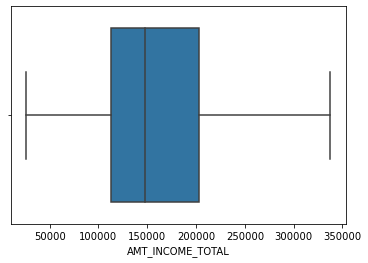

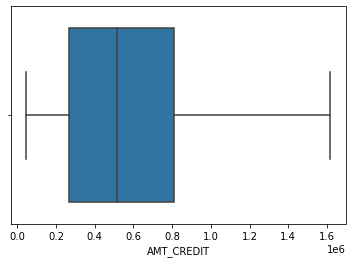

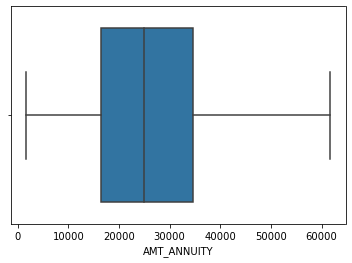

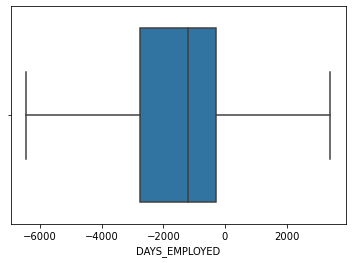

KeyError: 'DAYS_ID_PUBLISH'

In [35]:
# capping the numerical variable to handle the outliers and to get help for creating buckets
for i in numerical:
    q1 = new_application[i].describe()["25%"]
    q3 = new_application[i].describe()["75%"]
    iqr = q3 - q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    new_application[i] = np.where(new_application[i]>upper_bound,upper_bound,new_application[i])
    new_application[i] = np.where(new_application[i]<lower_bound,lower_bound,new_application[i])
    sns.boxplot(new_application[i])
    
    plt.show()
    

In [36]:
### accordingly now we can create the buckets for numeric variables

#### finding out the continous numeric variable creating buckets for these variables


In [37]:
### bins for AMT_INCOME_TOTAL
buckets = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
label = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

new_application['AMT_INCOME_RANGE']=pd.cut(new_application['AMT_INCOME_TOTAL'],bins=buckets,labels=label)

In [38]:
### creating buckets for AMT_CREDIT variables
buckets = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
label = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

new_application['AMT_CREDIT_RANGE']=pd.cut(new_application['AMT_CREDIT'], buckets,labels=label)

In [39]:
### creating buckets for AMT_ANNUITY variables
buckets = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,258025]
label = ['below 20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-140000','140000-160000','160000-180000','180000-200000','200000-220000','220000+']
new_application["AMT_ANNUITY_range"] =     pd.cut(new_application.AMT_ANNUITY,buckets, labels= label) 

#### standardising the dtypes and standardising some of the numeric columns

In [41]:
#coverting the days of birth to years of birth and treating the negative value of age which is not obvoius
new_application["YEARS_BIRTH"] = new_application.DAYS_BIRTH.apply(lambda x: abs(x/365))





In [42]:
#coverting the "DAYS_EMPLOYED" to years employed
new_application["YEARS_EMPLOYED"] = new_application.DAYS_EMPLOYED.apply(lambda x: abs(x/365))



In [43]:
#coverting the "DAYS_REGISTRATION" to years registration
new_application["YEARS_REGISTRATION"]= new_application.DAYS_REGISTRATION.apply(lambda x: abs(x/365))



In [44]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ... REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0  ...                      0                      0                       0   
1  ...                      0                      0                       0   
2  ...                      0                      0                       0   
3  ...                      0                      0                       0   
4  ...                      0                      1                       1   

        ORGANIZATION_TYPE  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0  Business Entity Type 3     200000-225000     400000-450000   
1                  School     250000-275000  900000 and above   
2              Government       50000-75000          0-150000   
3  Business Entity Type 3     125000-150000     300000-350000   
4                Religion     100000-125000     500000-550000   

   AMT_ANNUITY_range  YEARS_BIRTH YEARS_EMPLOYED  YEARS_REGISTRATION  
0        20000-40000    25.920548       1.745205            9.994521  
1        20000-40000    45.931507       3.254795            3.249315  
2        below 20000    52.180822       0.616438           11.671233  
3        20000-40000    52.068493       8.326027           26.939726  
4        20000-40000    54.608219       8.323288           11.810959  

[5 rows x 33 columns]

In [45]:
# dropping the columns"DAYS_REGISTRATION" ,,"DAYS_BIRTH" "DAYS_EMPLOYED"
new_application.drop(["DAYS_REGISTRATION" ,"DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1, inplace = True)

In [46]:
new_application.shape

(307510, 30)

In [47]:
new_application.nunique()

SK_ID_CURR                     307510
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2210
AMT_CREDIT                       4969
AMT_ANNUITY                     11674
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
ORGANIZATION_TYPE                  58
AMT_INCOME_RANGE                   13
AMT_CREDIT_RANGE                   17
AMT_ANNUITY_

In [48]:
categorical1 = ["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_INCOME_TYPE",
               "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE", 
               "WEEKDAY_APPR_PROCESS_START" ,
               "REG_REGION_NOT_LIVE_REGION" ,"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY" ,
               "REG_CITY_NOT_WORK_CITY" ,"LIVE_CITY_NOT_WORK_CITY" ,"ORGANIZATION_TYPE","AMT_INCOME_RANGE","AMT_CREDIT_RANGE","AMT_ANNUITY_range"]
idcol = ["SK_ID_CURR"]
numericals = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION"]

In [49]:
#analysing the categorical columns
for i in categorical:
    #new_application[i].value_counts()
    print(new_application[i].value_counts())

0    282685
1     24825
Name: TARGET, dtype: int64
Cash loans         278231
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104586
Name: FLAG_OWN_CAR, dtype: int64
Y    213311
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215370
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
Working                 158773
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10276
Lower secondary                   

In [50]:
##imputing this XNA with mode in CODE_GENDER
new_application.CODE_GENDER.mode()[0]

new_application.CODE_GENDER = new_application.CODE_GENDER.replace("XNA", new_application.CODE_GENDER.mode()[0])

In [51]:
## replacing N and Y with 0 and 1 for FLAG_OWN_CAR
new_application.FLAG_OWN_CAR = new_application.FLAG_OWN_CAR.apply(lambda x: x.replace("N","0"))
new_application.FLAG_OWN_CAR = new_application.FLAG_OWN_CAR.apply(lambda x: x.replace("Y","1"))

In [52]:
## replacing N and Y with 0 and 1 for FLAG_OWN_REALTY
new_application.FLAG_OWN_REALTY = new_application.FLAG_OWN_REALTY.apply(lambda x: x.replace("N","0"))
new_application.FLAG_OWN_REALTY = new_application.FLAG_OWN_REALTY.apply(lambda x: x.replace("Y","1"))
new_application.FLAG_OWN_REALTY.value_counts()

1    213311
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [53]:
new_application.NAME_FAMILY_STATUS.value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [54]:
# imputing the unknown with the mode value
new_application.NAME_FAMILY_STATUS.mode()[0]

'Married'

In [55]:
### we can replace the data of the unknown from NAME_FAMILY_STATUS with mode
new_application.NAME_FAMILY_STATUS = new_application.NAME_FAMILY_STATUS.apply(lambda x: x.replace("Unknown","Married"))

In [56]:
new_application.NAME_FAMILY_STATUS.value_counts()

Married                 196433
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [57]:
new_application.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    22.110500
XNA                       18.007219
Self-employed             12.491301
Other                      5.425189
Medicine                   3.639882
Business Entity Type 2     3.431758
Government                 3.383305
School                     2.891938
Trade: type 7              2.546584
Kindergarten               2.237326
Construction               2.185620
Business Entity Type 1     1.945953
Transport: type 4          1.755390
Trade: type 3              1.135248
Industry: type 9           1.095249
Industry: type 3           1.065982
Security                   1.055901
Housing                    0.961920
Industry: type 11          0.879321
Military                   0.856558
Bank                       0.815258
Agriculture                0.798023
Police                     0.761276
Transport: type 2          0.716725
Postal                     0.701441
Security Ministries        0.641930
Trade: type 2              0.617866
Restaurant                 0

In [58]:
### replacing the XNA from the organisation type as other it has more than 18% of data so imputing with mode will affect the data
new_application.ORGANIZATION_TYPE = new_application.ORGANIZATION_TYPE.replace("XNA","Other")
new_application.shape

(307510, 30)

In [59]:
new_application.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Other                     23.432409
Business Entity Type 3    22.110500
Self-employed             12.491301
Medicine                   3.639882
Business Entity Type 2     3.431758
Government                 3.383305
School                     2.891938
Trade: type 7              2.546584
Kindergarten               2.237326
Construction               2.185620
Business Entity Type 1     1.945953
Transport: type 4          1.755390
Trade: type 3              1.135248
Industry: type 9           1.095249
Industry: type 3           1.065982
Security                   1.055901
Housing                    0.961920
Industry: type 11          0.879321
Military                   0.856558
Bank                       0.815258
Agriculture                0.798023
Police                     0.761276
Transport: type 2          0.716725
Postal                     0.701441
Security Ministries        0.641930
Trade: type 2              0.617866
Restaurant                 0.588924
Services                   0

In [60]:
new_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  int64   
 2   NAME_CONTRACT_TYPE           307510 non-null  object  
 3   CODE_GENDER                  307510 non-null  object  
 4   FLAG_OWN_CAR                 307510 non-null  object  
 5   FLAG_OWN_REALTY              307510 non-null  object  
 6   CNT_CHILDREN                 307510 non-null  int64   
 7   AMT_INCOME_TOTAL             307510 non-null  float64 
 8   AMT_CREDIT                   307510 non-null  float64 
 9   AMT_ANNUITY                  307510 non-null  float64 
 10  NAME_INCOME_TYPE             307510 non-null  object  
 11  NAME_EDUCATION_TYPE          307510 non-null  object  
 12  NAME_FAMILY_STATUS           307510 non-null

## seggregating the dataframe as per the target to find out the imbalance

In [61]:
new_application.TARGET.value_counts(normalize = True)*100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

In [62]:
#Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations,
#i.e one class label has a very high number of observations and the other has a very low number of observations.
target_1 = new_application.loc[new_application.TARGET == 1]
print(target_1.shape)
target_0 = new_application.loc[new_application.TARGET == 0]
print(target_0.shape)



(24825, 30)
(282685, 30)


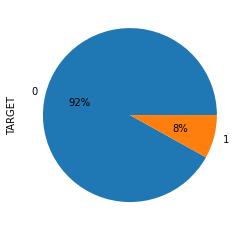

In [63]:
#### calculating the percent of imbalace
new_application.TARGET.value_counts().plot.pie(autopct='%.0f%%')
plt.show()

In [64]:
round(len(target_1)/len(target_0),2)*100

9.0

In [65]:
categorical1 = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_INCOME_TYPE",
               "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE", 
               "ORGANIZATION_TYPE","AMT_INCOME_RANGE","AMT_CREDIT_RANGE","AMT_ANNUITY_range"]

idcol = ["SK_ID_CURR"]
numericals = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION"]
others = [ "WEEKDAY_APPR_PROCESS_START" ,
               "REG_REGION_NOT_LIVE_REGION" ,"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY" ,
               "REG_CITY_NOT_WORK_CITY" ,"LIVE_CITY_NOT_WORK_CITY"]

### numerical Univariate Analysis in logarithmic scale for target=0, that is customers with no payment difficulties)

distplot for  AMT_INCOME_TOTAL


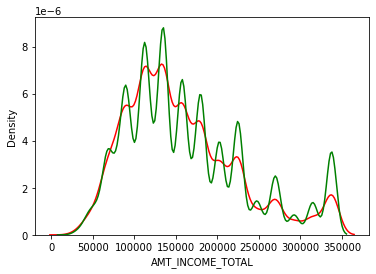

distplot for  AMT_CREDIT


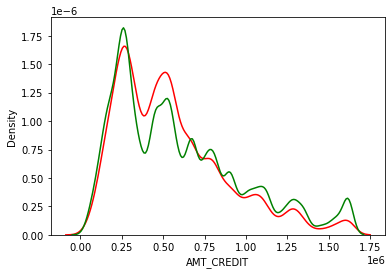

distplot for  AMT_ANNUITY


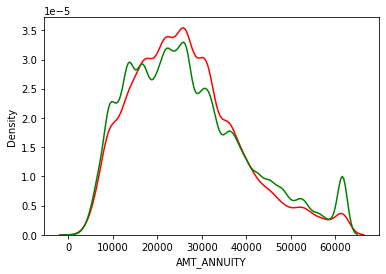

distplot for  YEARS_BIRTH


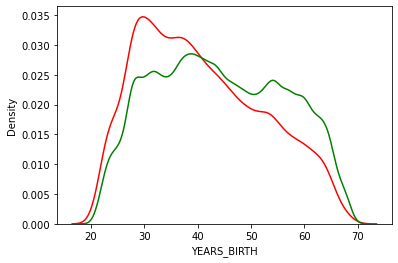

distplot for  YEARS_EMPLOYED


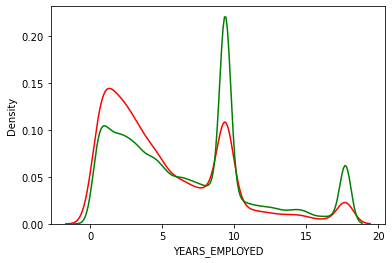

distplot for  YEARS_REGISTRATION


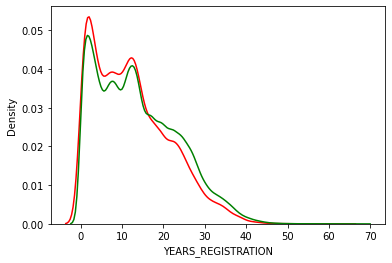

In [66]:
for i in numericals:
    print("distplot for ", i)
    sns.distplot(target_1[i],hist=False,label='diificult payment',color = "r")
    sns.distplot(target_0[i],hist=False,label='no difficult payment',color = "g")
    plt.show()

### numerical Univariate Analysis in logarithmic scale for target=0, that is customers with no payment difficulties)

In [67]:
def plotting(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(new_application[col].unique()) + 7 + 4*len(temp.unique()) 
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = new_application, x= col, order=new_application[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

distribution of NAME_CONTRACT_TYPE


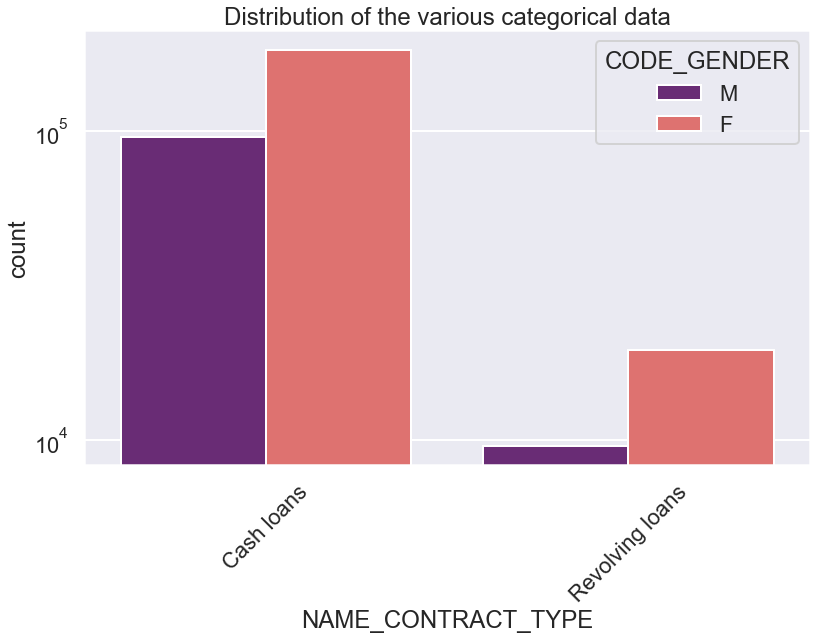

distribution of CODE_GENDER


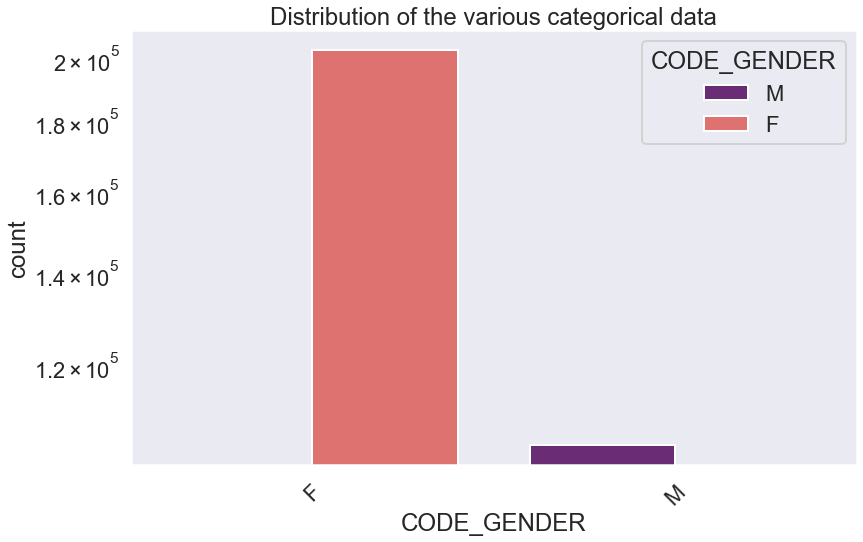

distribution of FLAG_OWN_CAR


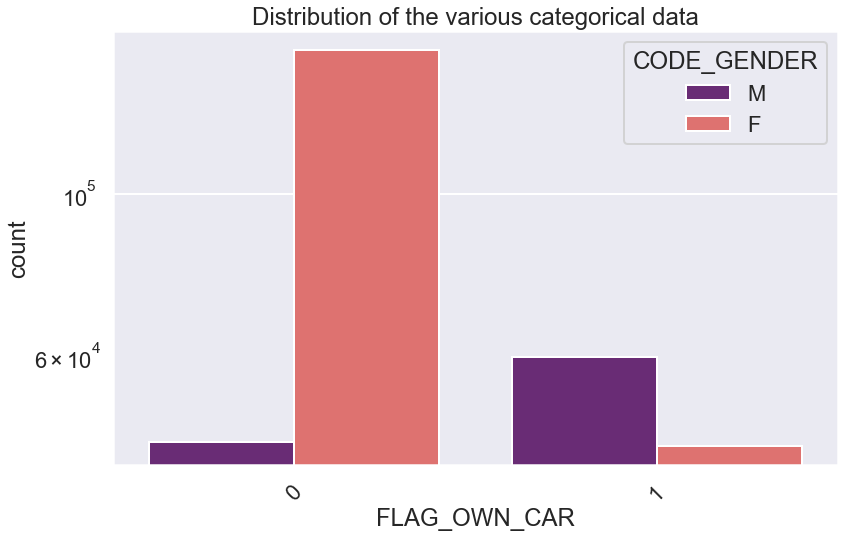

distribution of FLAG_OWN_REALTY


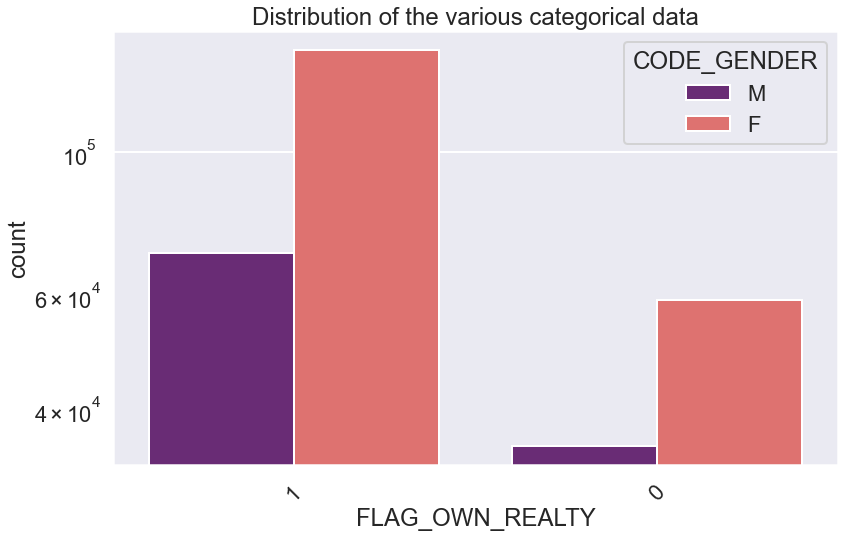

distribution of CNT_CHILDREN


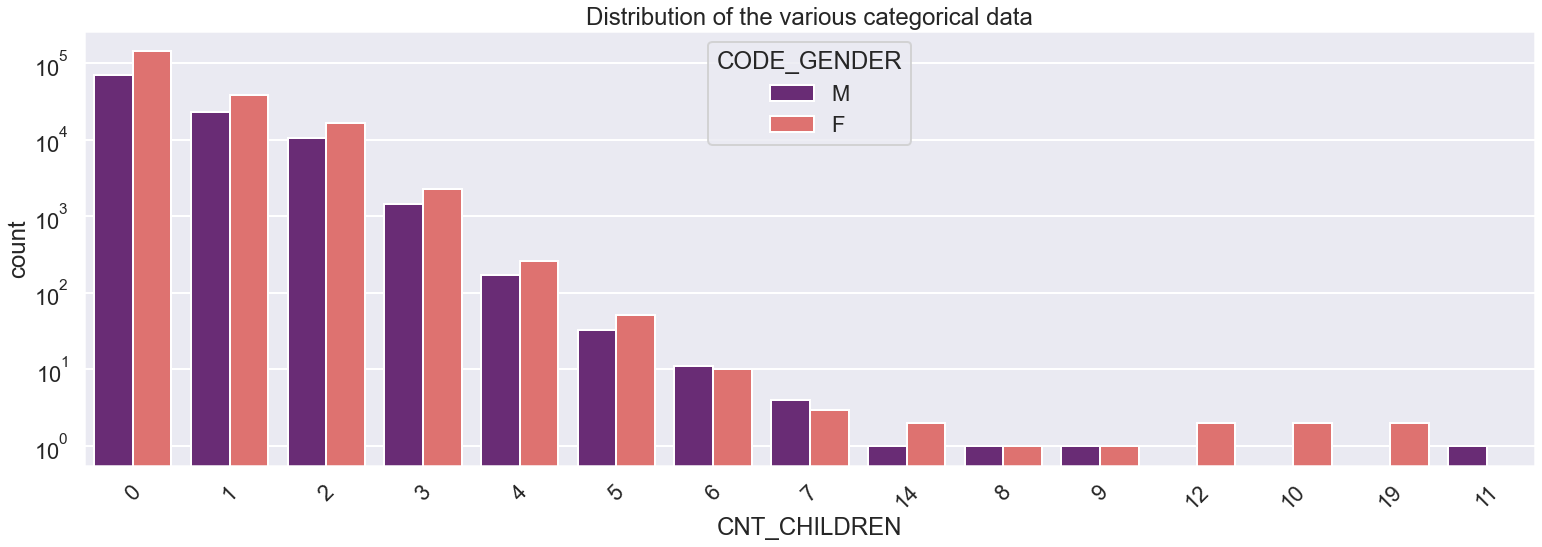

distribution of NAME_INCOME_TYPE


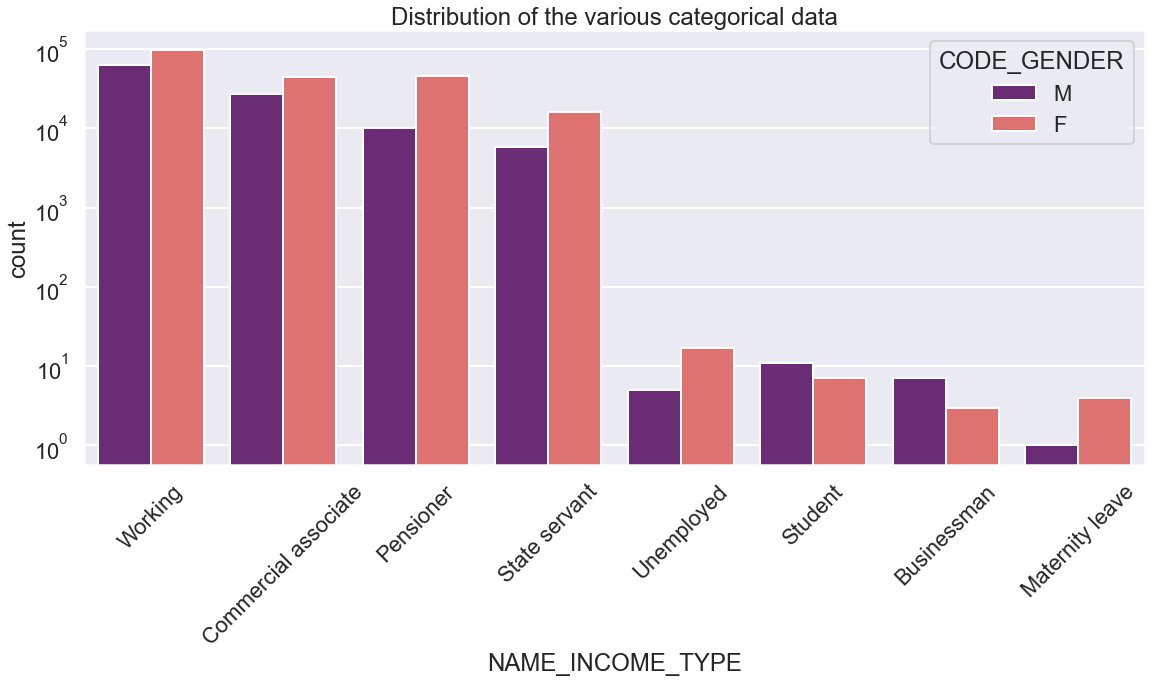

distribution of NAME_EDUCATION_TYPE


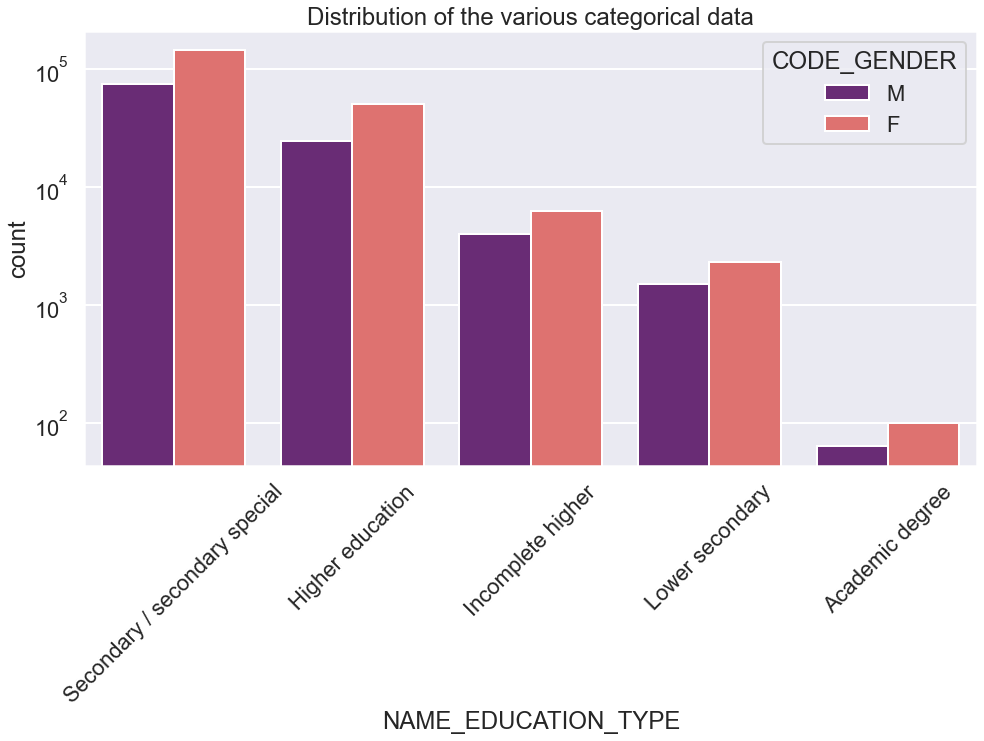

distribution of NAME_FAMILY_STATUS


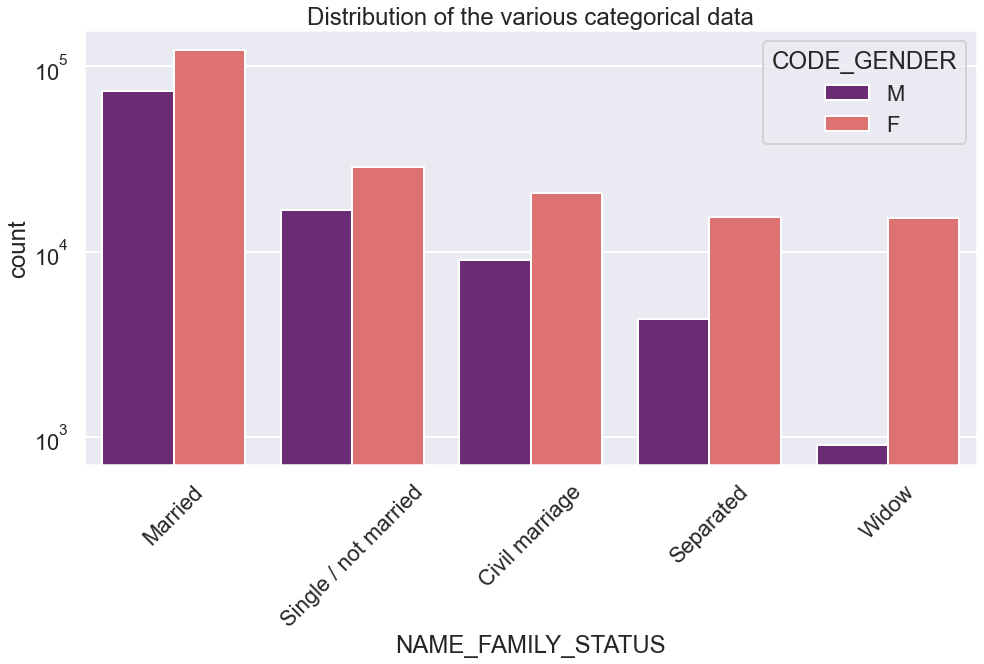

distribution of NAME_HOUSING_TYPE


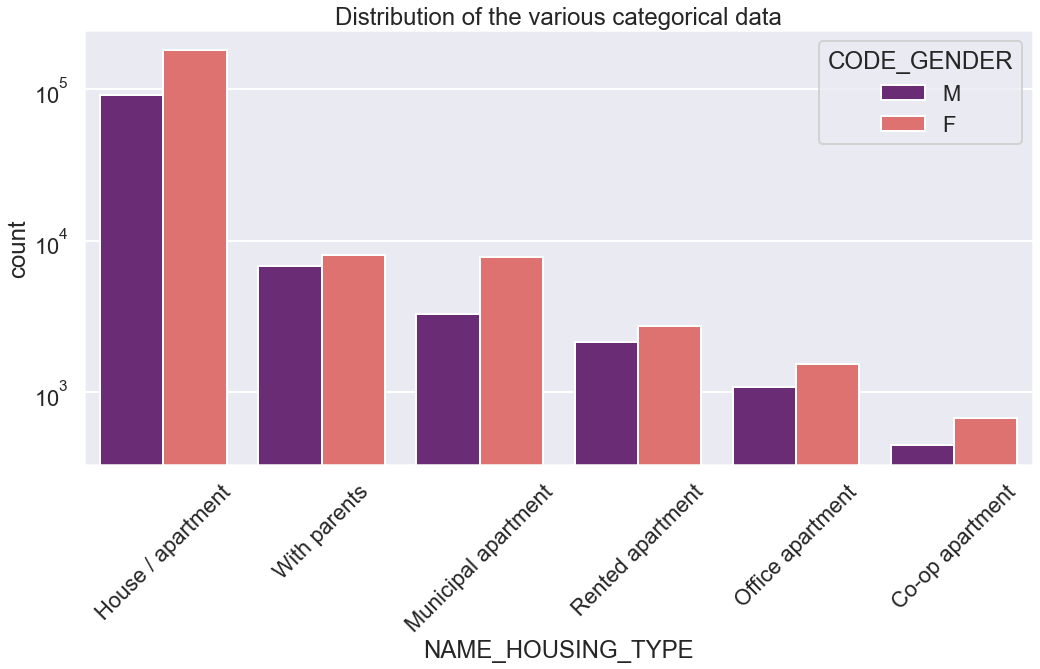

distribution of REGION_POPULATION_RELATIVE


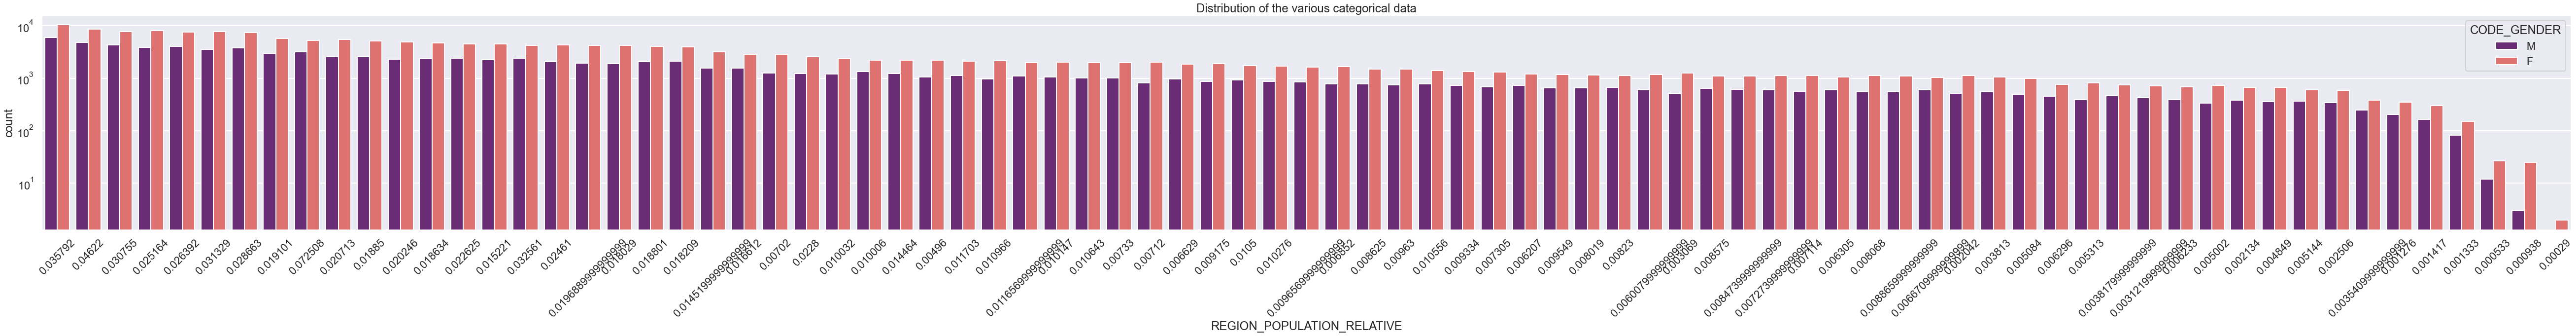

distribution of ORGANIZATION_TYPE


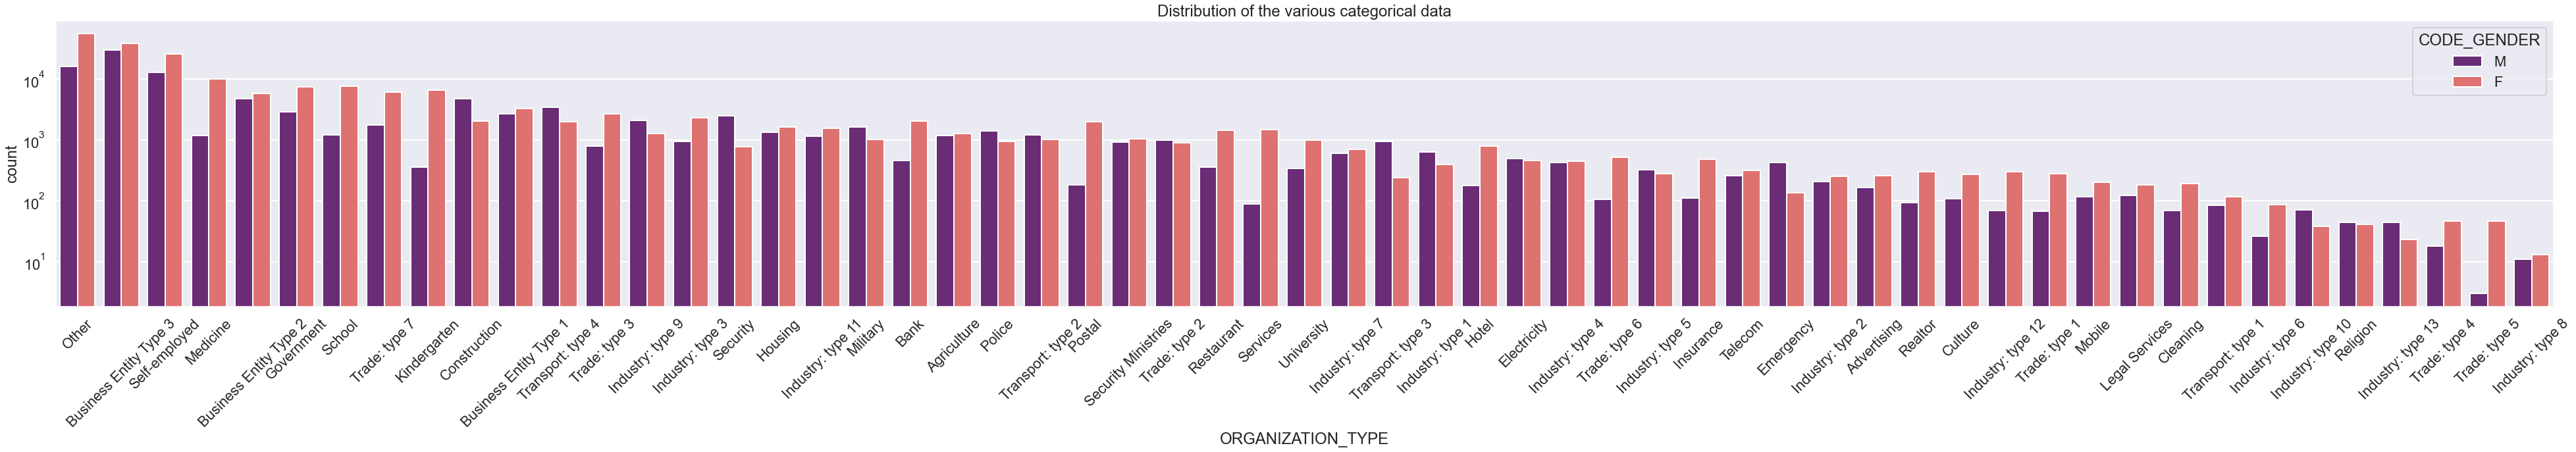

distribution of AMT_INCOME_RANGE


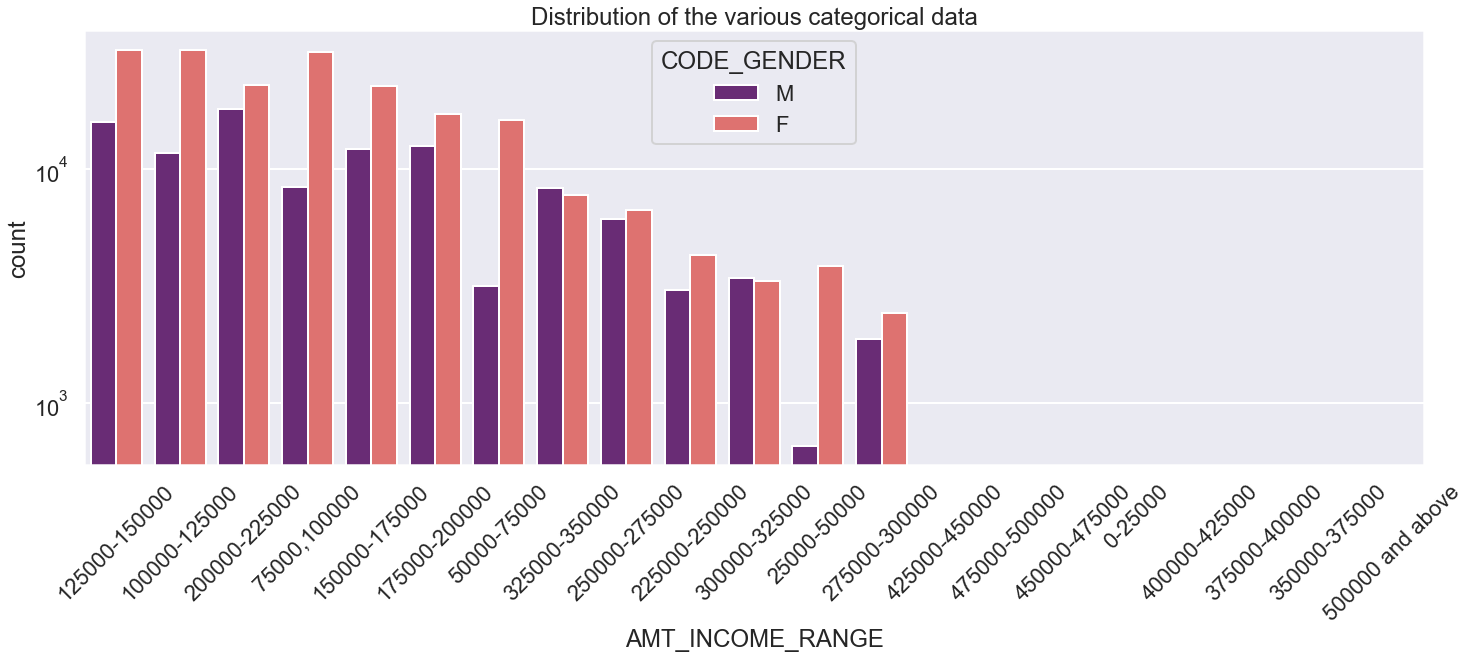

distribution of AMT_CREDIT_RANGE


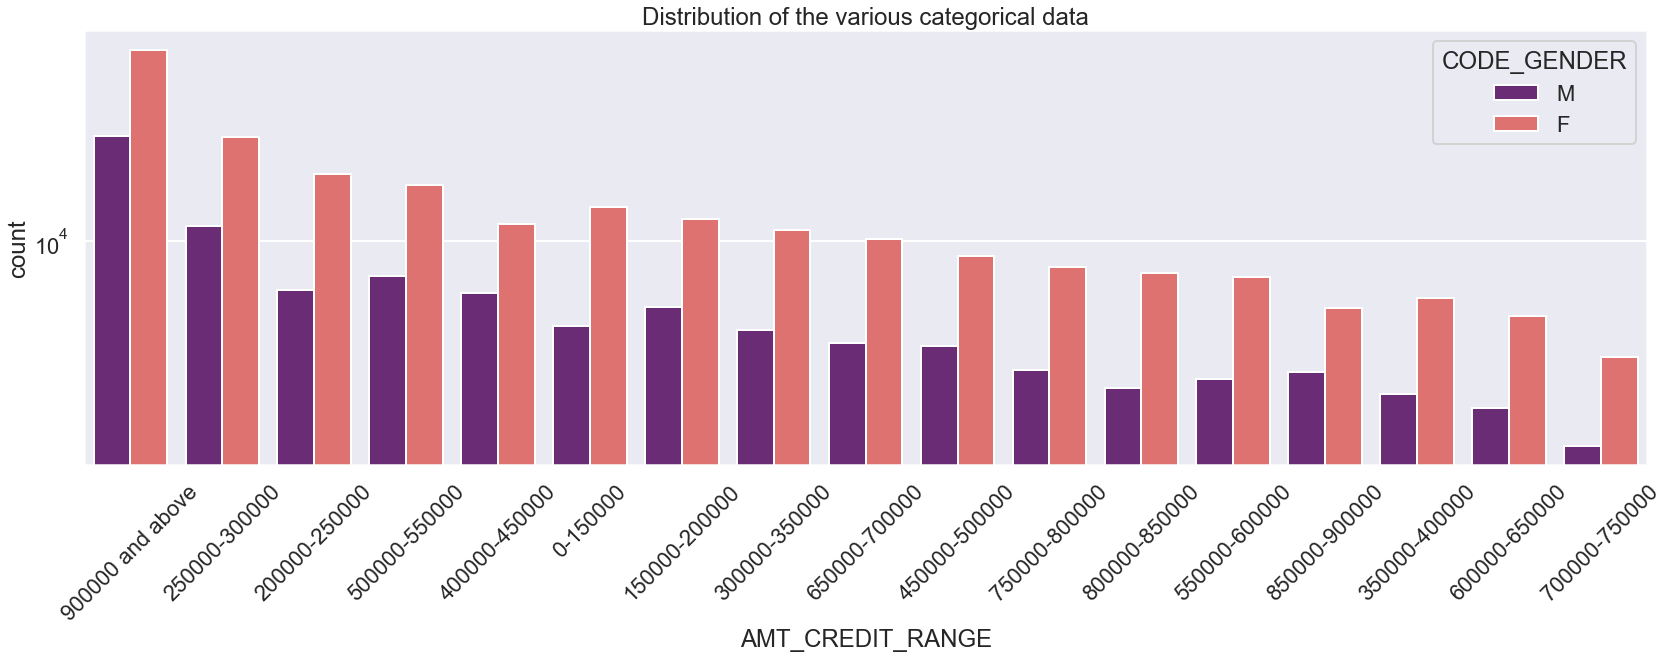

distribution of AMT_ANNUITY_range


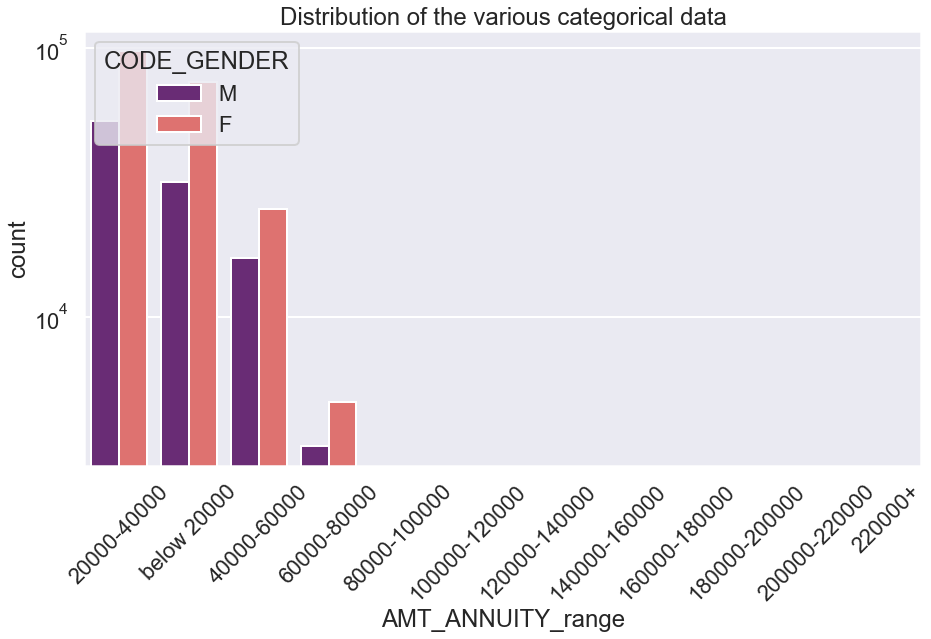

In [68]:
for i in categorical1:
    print("distribution of", i)
    plotting(target_0,col= i ,title='Distribution of the various categorical data',hue='CODE_GENDER')
    

##we can conclude that a the credit provided is mostly higer in amount and loan given are mostly to the women
###most of the customer who dont have payment difficulties are from the housing type house/apartment and here also we see that women are laeding,wew can assume that loans provided to women is easier

#female counts are higher than male.
customer who dont have payments difficlties are mostly from high income range group

#For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
For this Females are having more number of credits than male. and these are the customers more in count who dont have payment difficulties compared to others

#Less number of credits for income type ‘student businessmen and women in the maternity period





# Plotting for Organization type in logarithmic scale for target 0


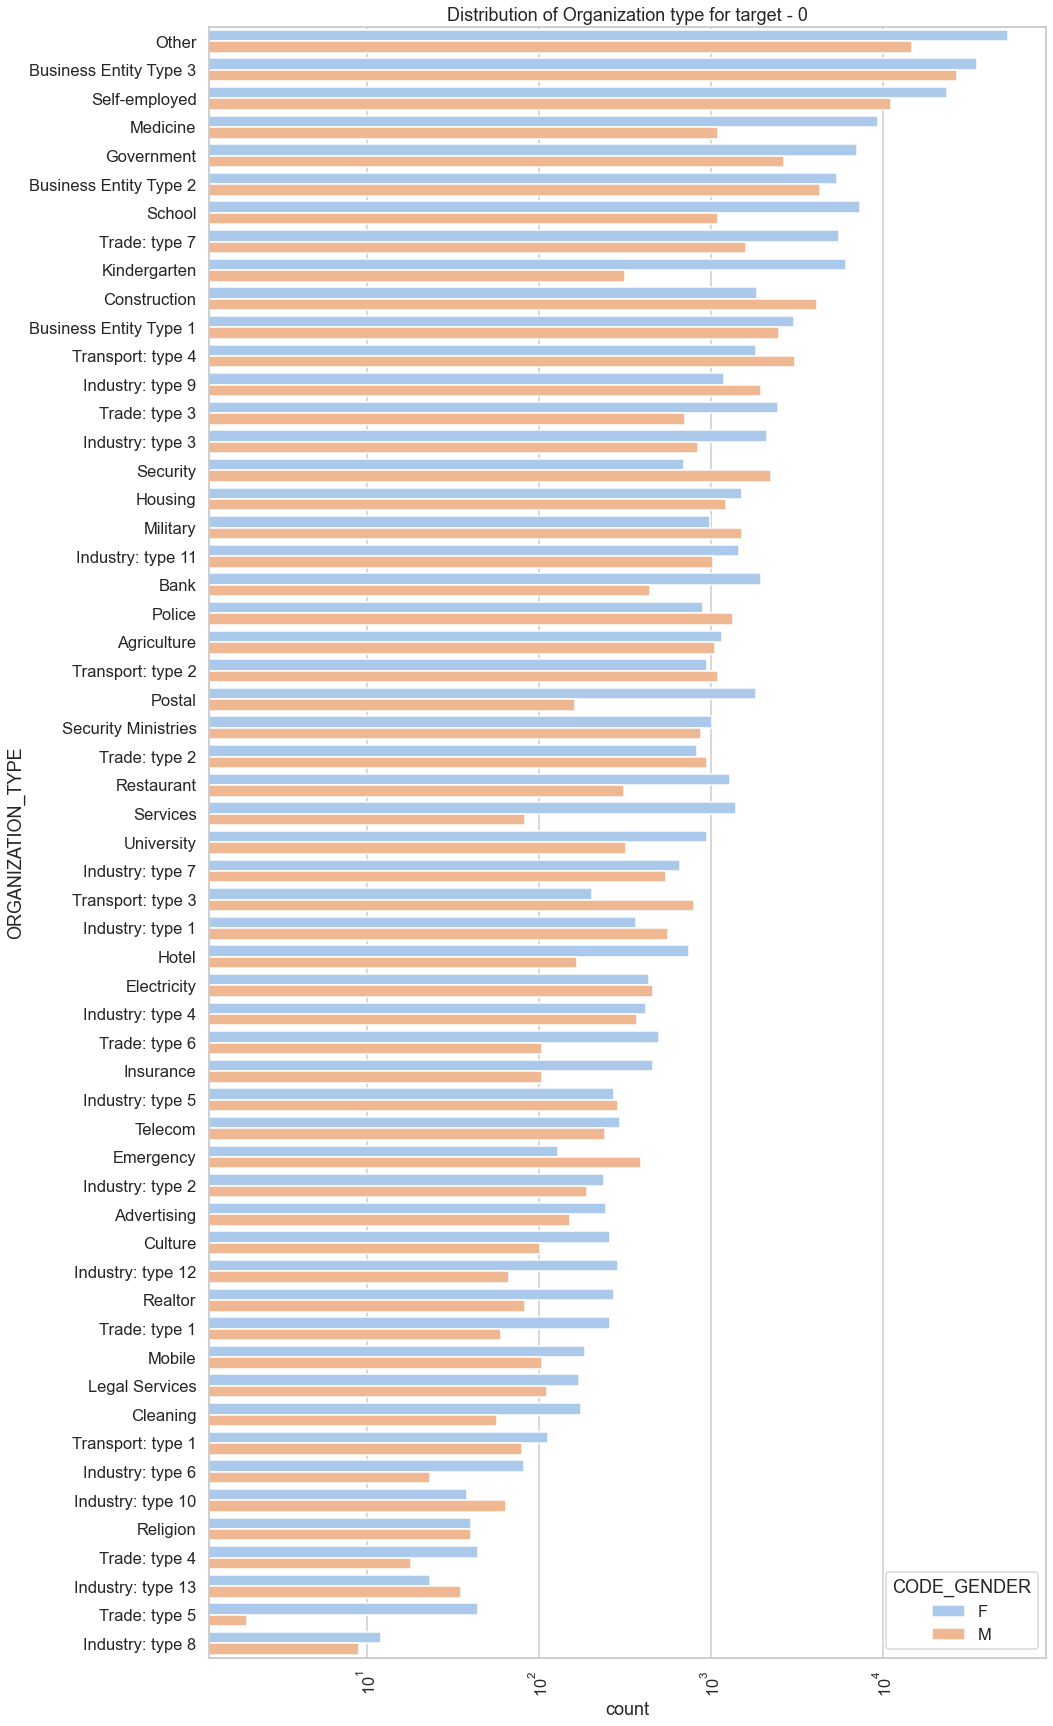

In [69]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='pastel', hue = 'CODE_GENDER')

plt.show()

In [70]:
new_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  int64   
 2   NAME_CONTRACT_TYPE           307510 non-null  object  
 3   CODE_GENDER                  307510 non-null  object  
 4   FLAG_OWN_CAR                 307510 non-null  object  
 5   FLAG_OWN_REALTY              307510 non-null  object  
 6   CNT_CHILDREN                 307510 non-null  int64   
 7   AMT_INCOME_TOTAL             307510 non-null  float64 
 8   AMT_CREDIT                   307510 non-null  float64 
 9   AMT_ANNUITY                  307510 non-null  float64 
 10  NAME_INCOME_TYPE             307510 non-null  object  
 11  NAME_EDUCATION_TYPE          307510 non-null  object  
 12  NAME_FAMILY_STATUS           307510 non-null

## plotting for categorical for customers having payment difficulties

distribution of NAME_CONTRACT_TYPE  for clients havinf payment difficulties


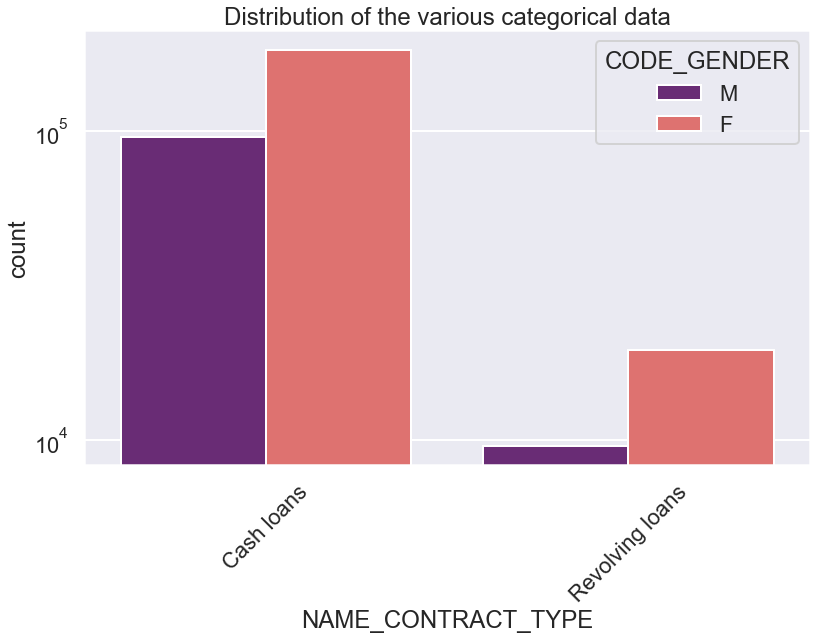

distribution of CODE_GENDER  for clients havinf payment difficulties


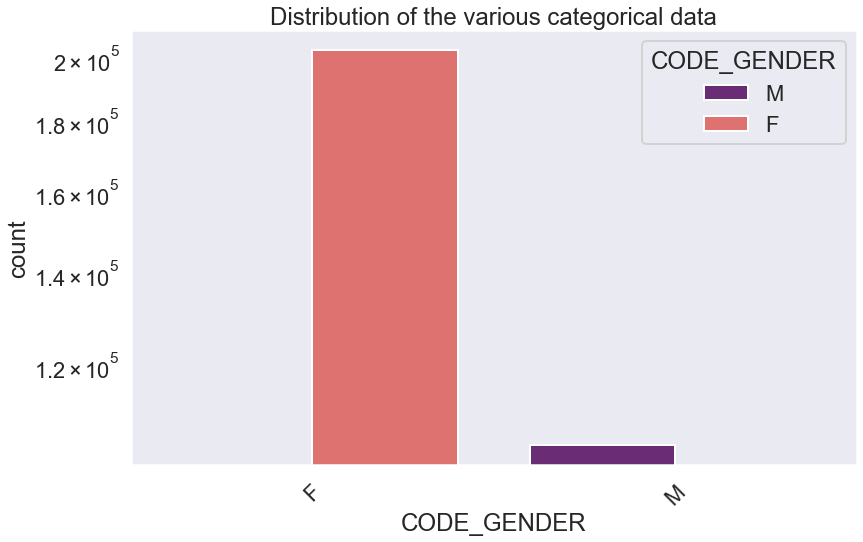

distribution of FLAG_OWN_CAR  for clients havinf payment difficulties


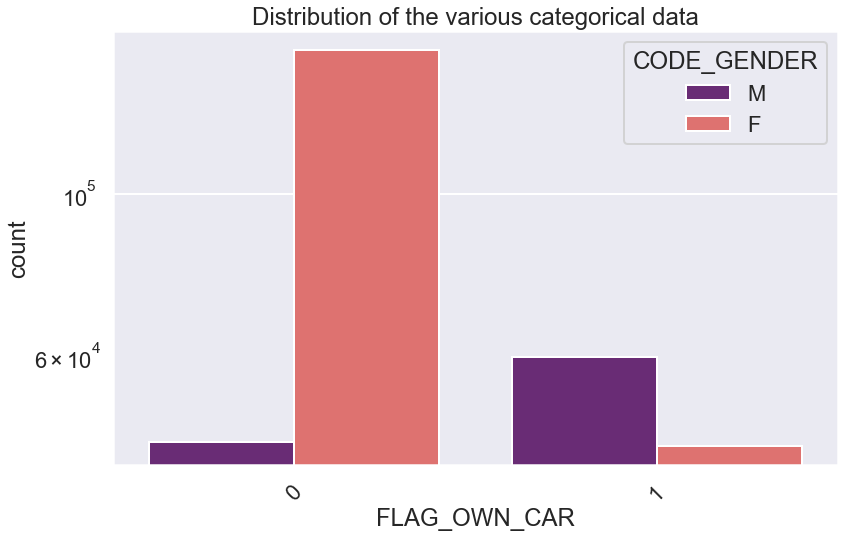

distribution of FLAG_OWN_REALTY  for clients havinf payment difficulties


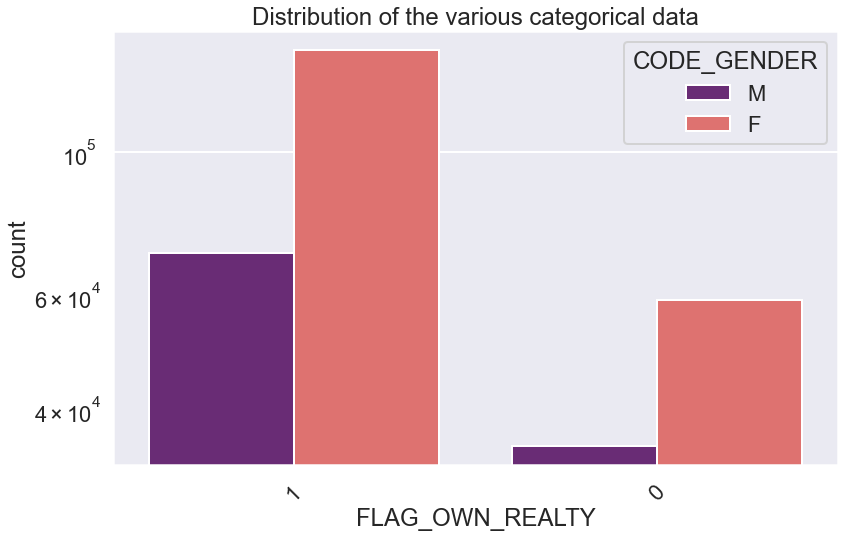

distribution of CNT_CHILDREN  for clients havinf payment difficulties


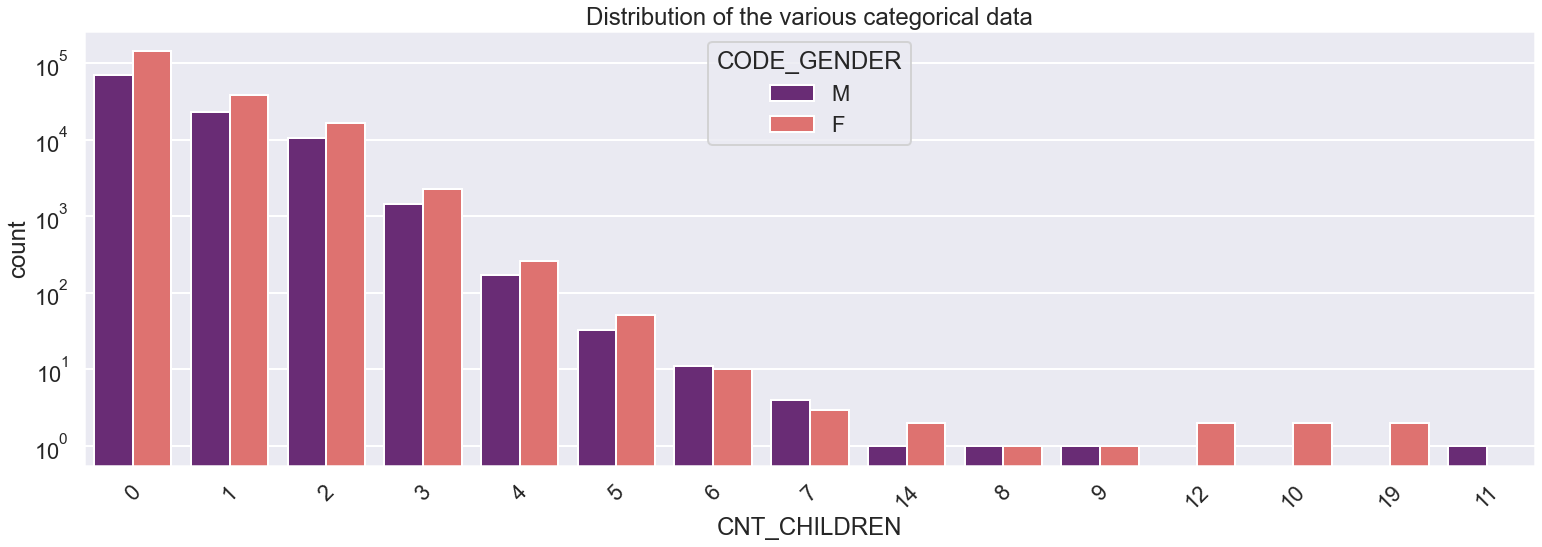

distribution of NAME_INCOME_TYPE  for clients havinf payment difficulties


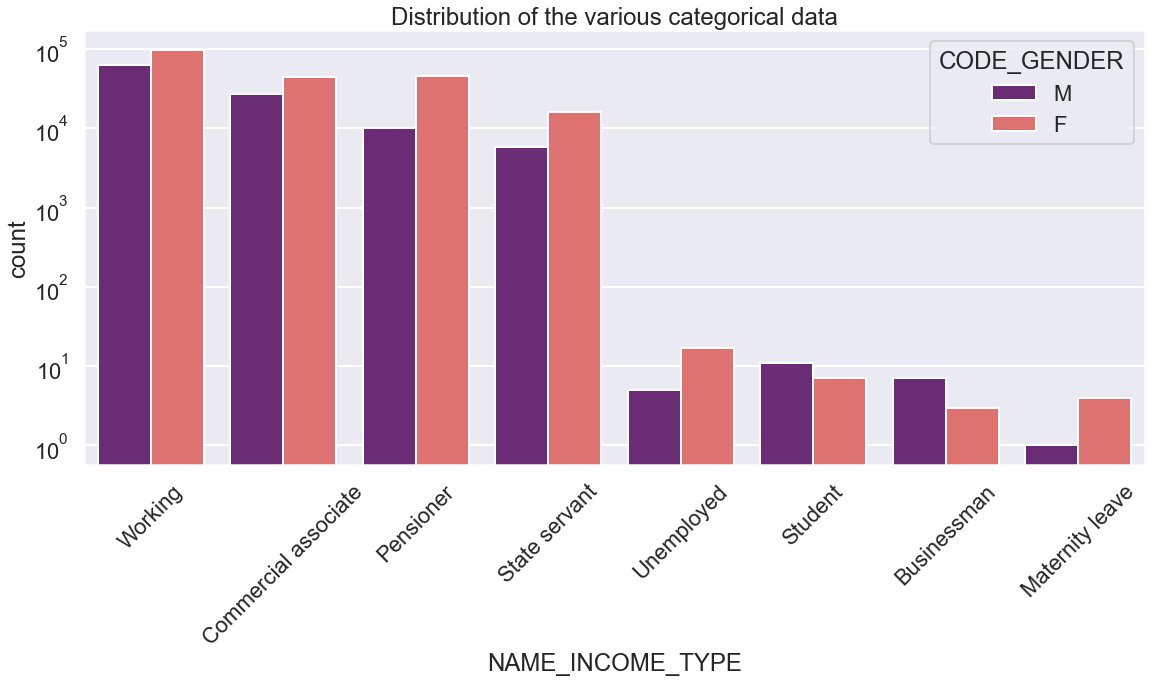

distribution of NAME_EDUCATION_TYPE  for clients havinf payment difficulties


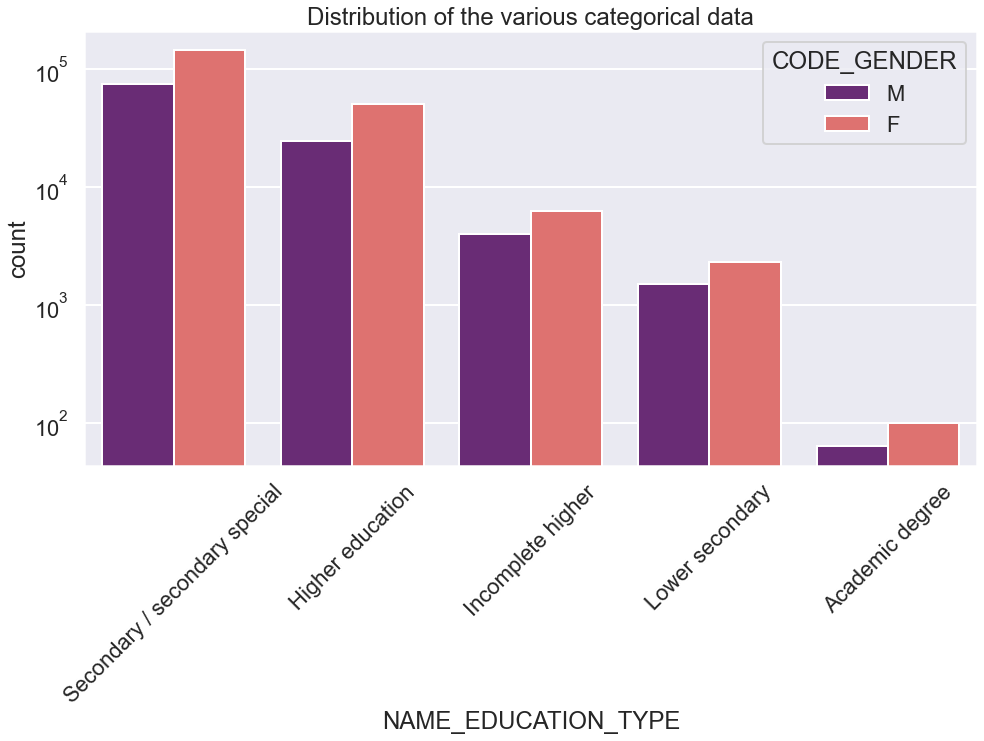

distribution of NAME_FAMILY_STATUS  for clients havinf payment difficulties


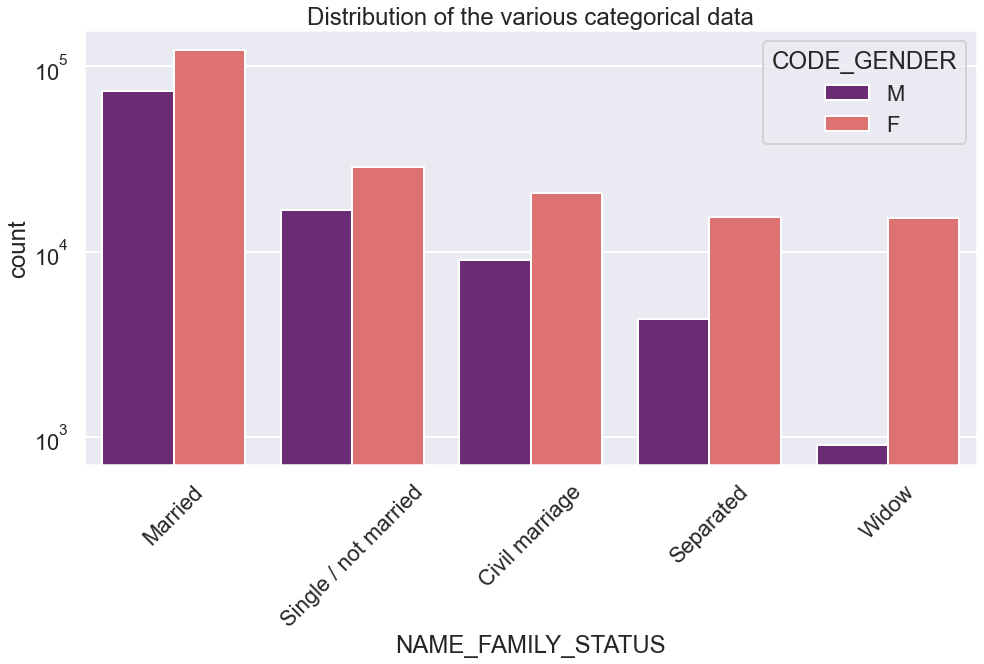

distribution of NAME_HOUSING_TYPE  for clients havinf payment difficulties


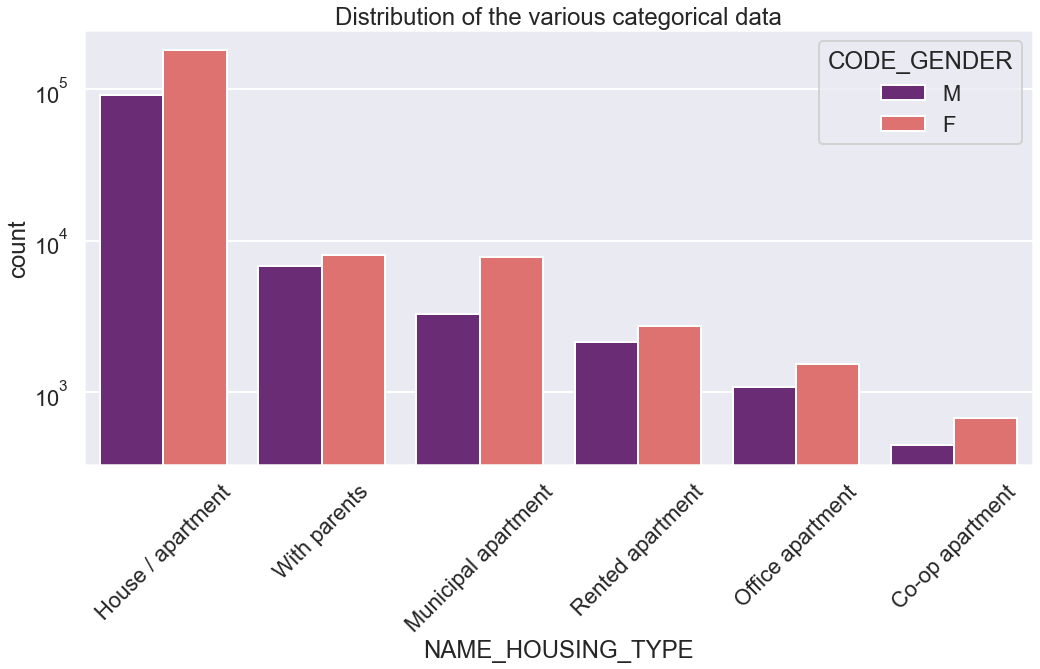

distribution of REGION_POPULATION_RELATIVE  for clients havinf payment difficulties


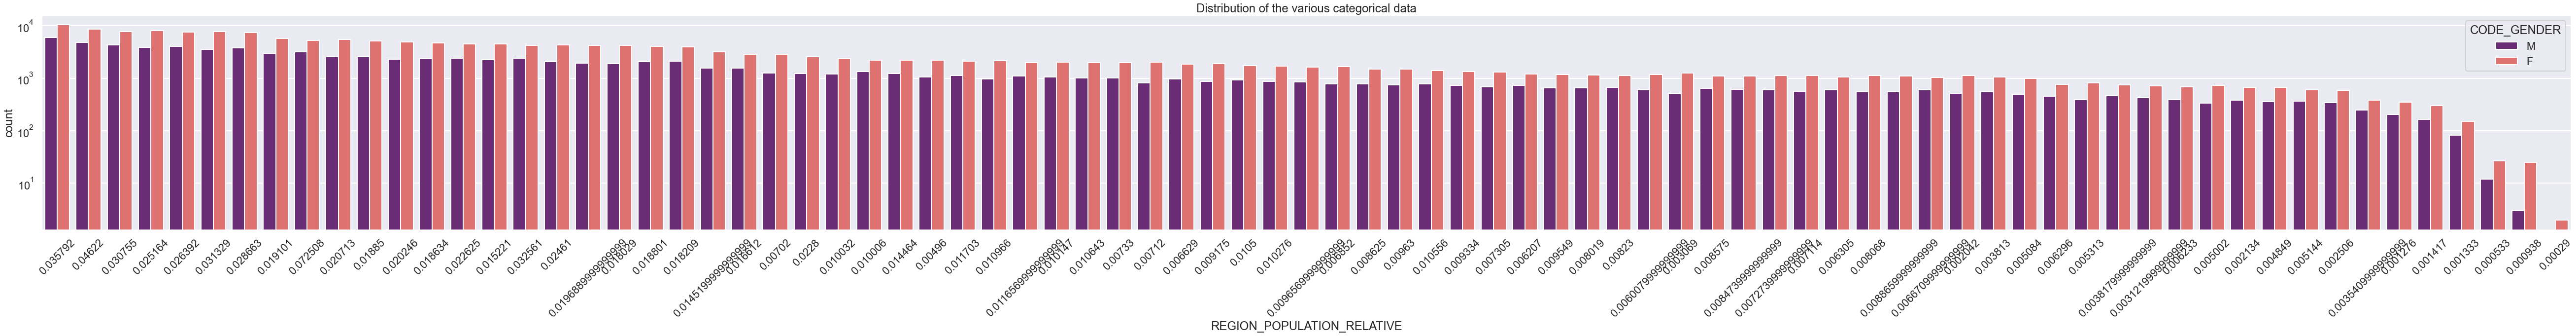

distribution of ORGANIZATION_TYPE  for clients havinf payment difficulties


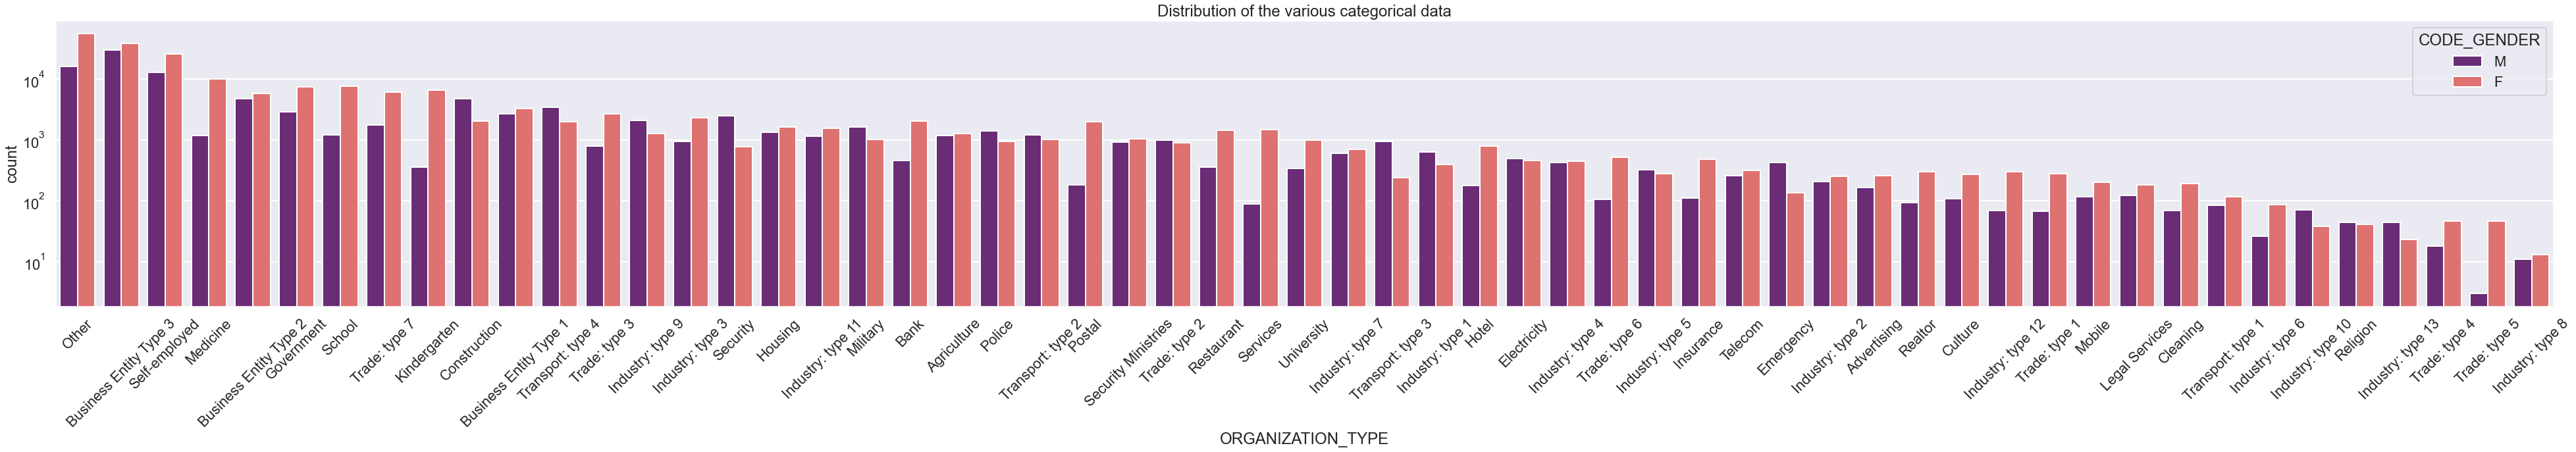

distribution of AMT_INCOME_RANGE  for clients havinf payment difficulties


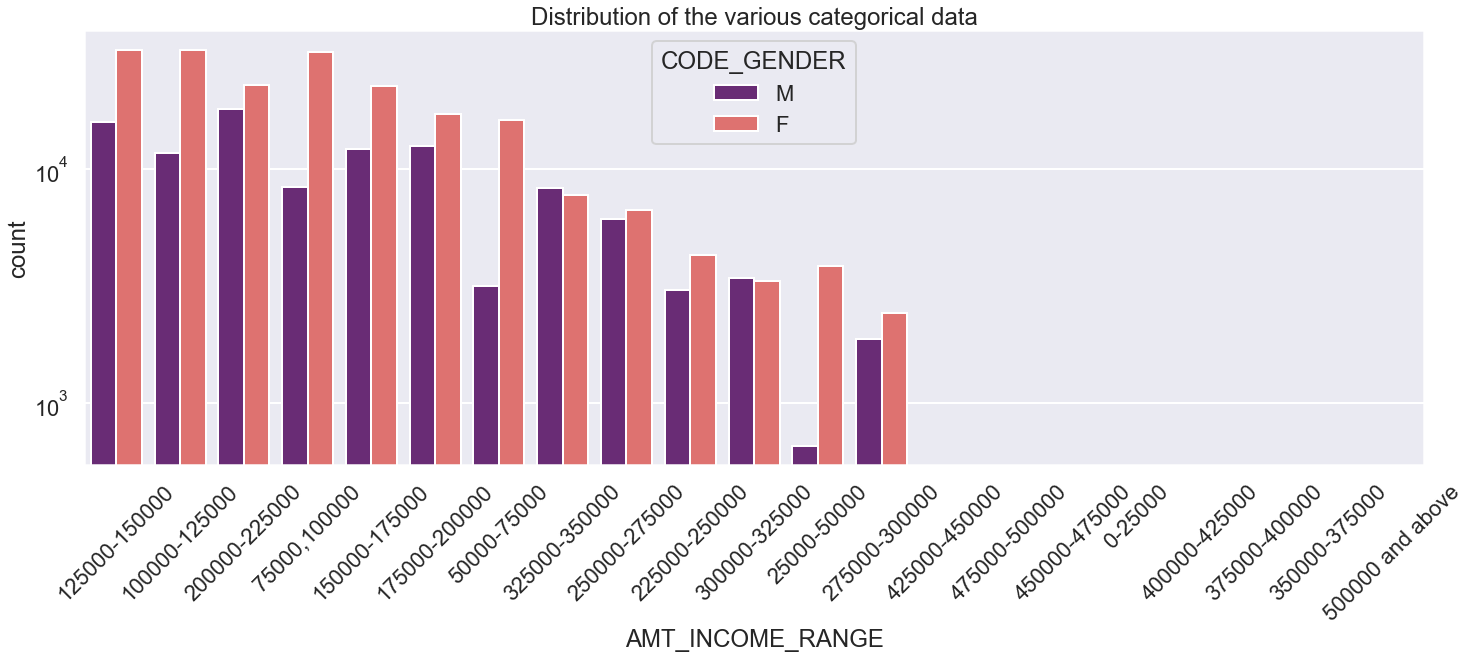

distribution of AMT_CREDIT_RANGE  for clients havinf payment difficulties


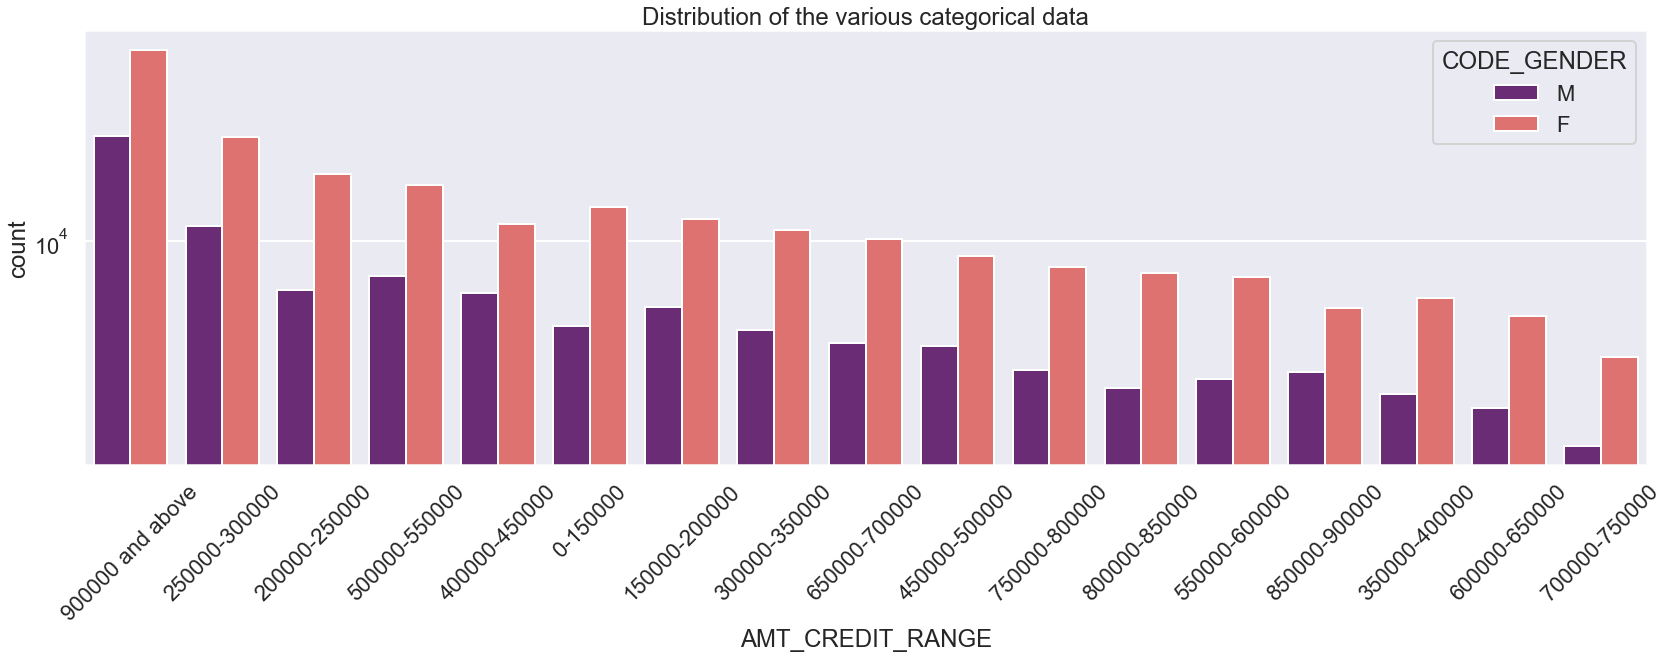

distribution of AMT_ANNUITY_range  for clients havinf payment difficulties


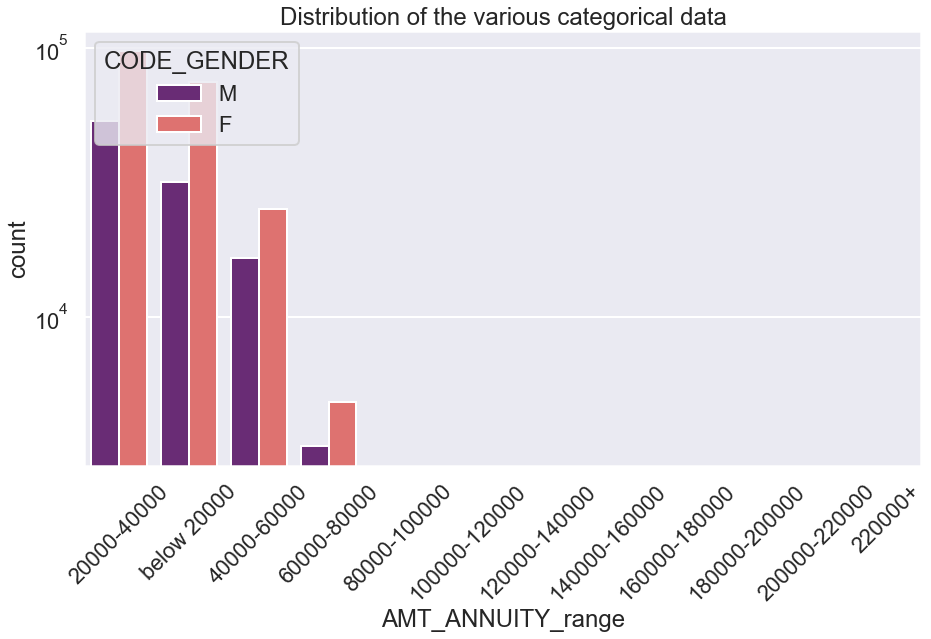

In [72]:
### plotting for various categorical variable for people with no payment difficulties 
for i in categorical1:
    print("distribution of", i, " for clients havinf payment difficulties")
   
    plotting(target_1,col= i ,title='Distribution of the various categorical data',hue='CODE_GENDER')
    


#conclusion high amt of  credit given to the customer and esp women are the major proportion having difficulty in payments

a)For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other and also have payments difficulties and female are provide with more amount of credit

b)Less number of credits for income type ‘Maternity leave’ ,‘student’ , ’pensioner’ and ‘Businessman’.and hence lesser chance of these group to default 

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits.
For type 1 : there is only Female Revolving loans.

#Plotting for Organization type for target 1

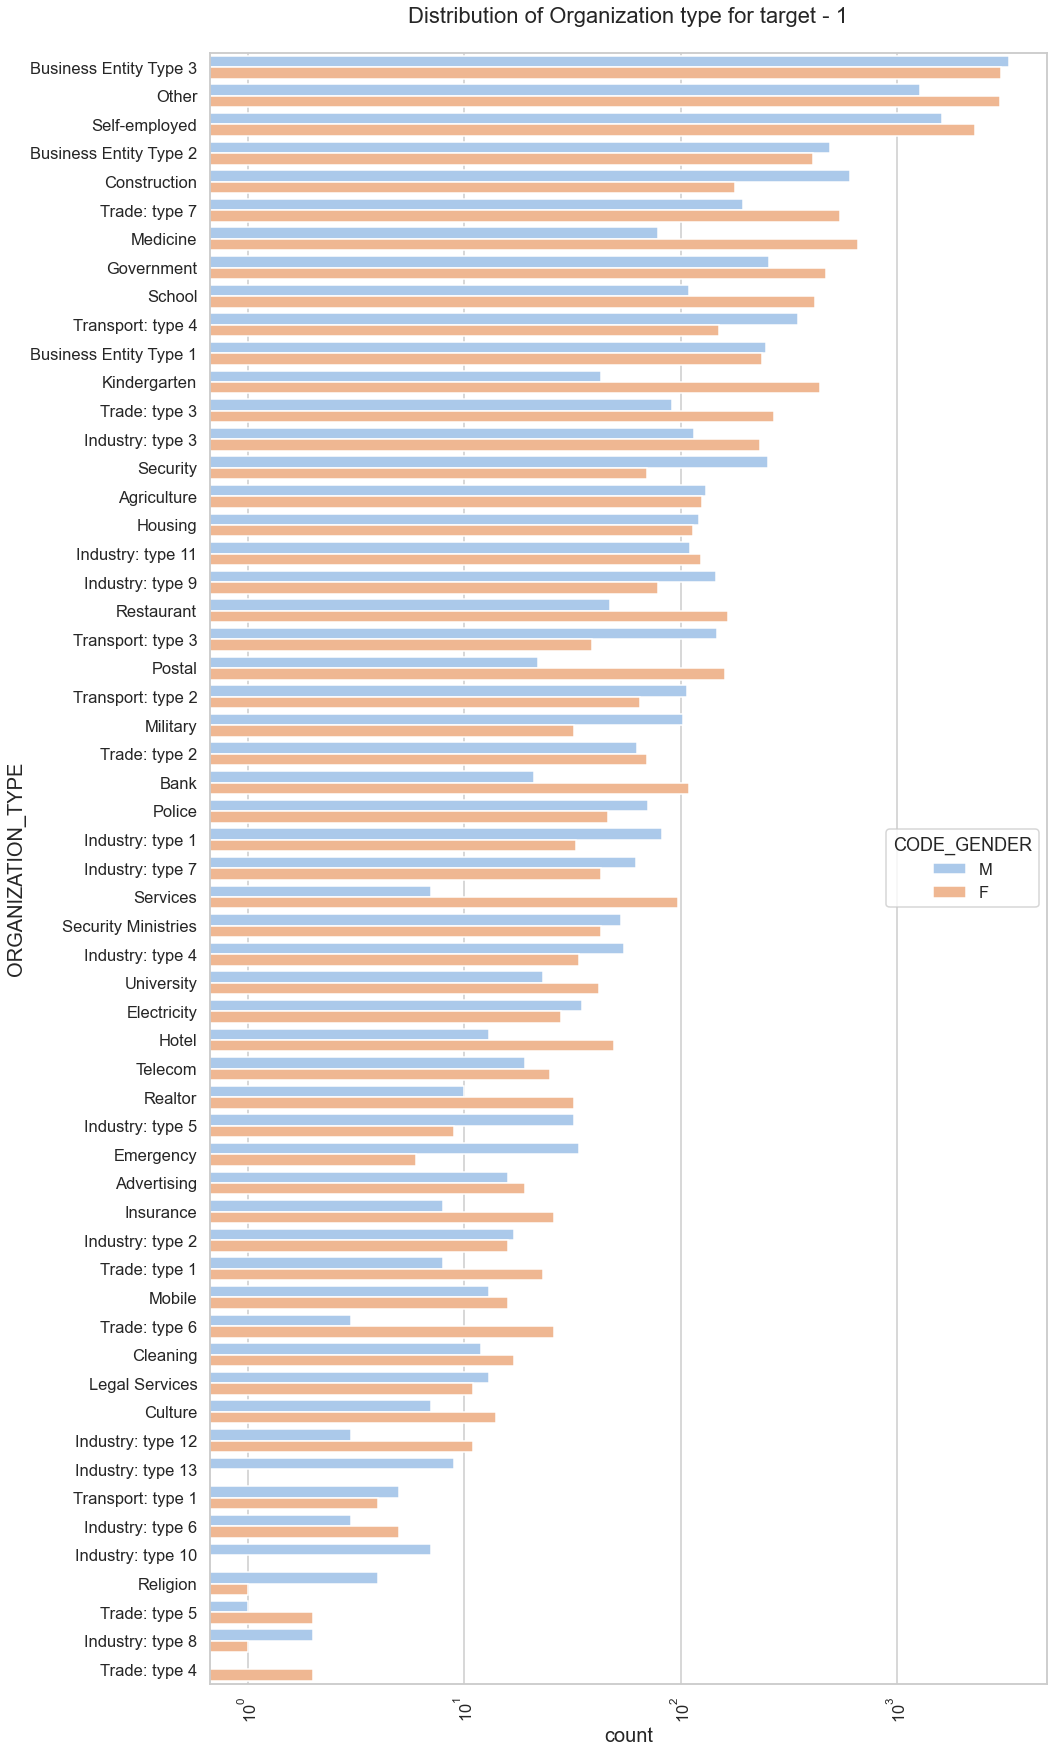

In [73]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_1['ORGANIZATION_TYPE'].value_counts().index,palette='pastel', hue = 'CODE_GENDER' )

plt.show()

#Points to be concluded from the above graph.

Clients which have applied for credits and  having payment difficulties are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Same as type 0 in distribution of organization type.

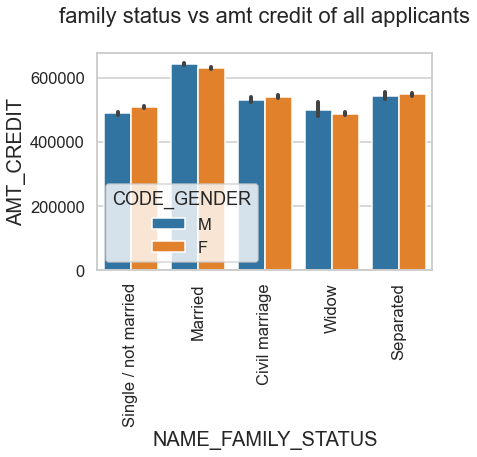

In [78]:
#plotting for "family status vs amt credit"
plt.title("family status vs amt credit of all applicants")
sns.barplot(data = new_application, x = "NAME_FAMILY_STATUS", y = "AMT_CREDIT", hue = "CODE_GENDER")


plt.xticks(rotation = 90)
plt.show()

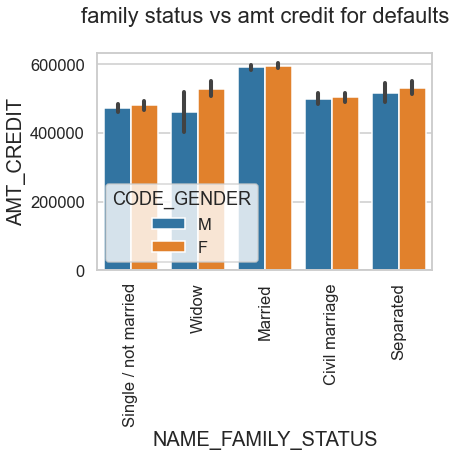

In [79]:
plt.title("family status vs amt credit for defaults")
sns.barplot(data = target_1, x = "NAME_FAMILY_STATUS", y = "AMT_CREDIT", hue = "CODE_GENDER")
plt.xticks(rotation = 90)
plt.show()

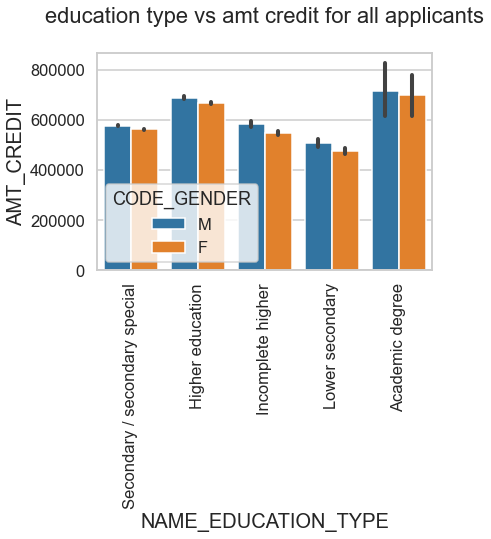

In [80]:
#plotting for  "education type vs amt credit ""
plt.title("education type vs amt credit for all applicants") 
sns.barplot(data = new_application, x = "NAME_EDUCATION_TYPE", y = "AMT_CREDIT", hue = "CODE_GENDER")
plt.xticks(rotation = 90)
plt.show()

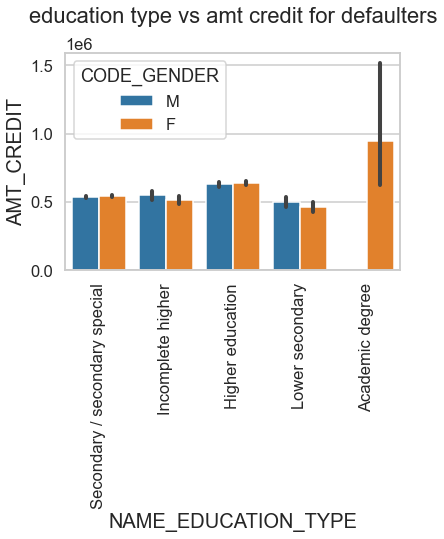

In [81]:
#plotting for  "education type vs amt credit for defaulter ""
plt.title("education type vs amt credit for defaulters") 
sns.barplot(data = target_1, x = "NAME_EDUCATION_TYPE", y = "AMT_CREDIT", hue = "CODE_GENDER" )
plt.xticks(rotation = 90)
plt.show()

In [82]:
# Finding some correlation for numerical columns for both target 0 and 1 , we are taking the colums from 2 as 0 and 1 are id and target coulmn

target_0_c=target_0.iloc[0:,2:]
target_1_c=target_1.iloc[0:,2:]

target0=target_0_c.corr(method='spearman')
target1=target_1_c.corr(method='spearman')

In [83]:
target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.038267    0.002324   
AMT_INCOME_TOTAL                 0.038267          1.000000    0.415719   
AMT_CREDIT                       0.002324          0.415719    1.000000   
AMT_ANNUITY                      0.024762          0.485376    0.831861   
REGION_POPULATION_RELATIVE      -0.025552          0.097573    0.053555   
HOUR_APPR_PROCESS_START          0.001726          0.102335    0.051348   
REG_REGION_NOT_LIVE_REGION      -0.010739          0.078306    0.019064   
REG_REGION_NOT_WORK_REGION       0.015455          0.161385    0.045392   
LIVE_REGION_NOT_WORK_REGION      0.021523          0.148928    0.047715   
REG_CITY_NOT_LIVE_CITY           0.027787          0.020398   -0.026657   
REG_CITY_NOT_WORK_CITY           0.076211          0.040204   -0.012657   
LIVE_CITY_NOT_WORK_CITY          0.071584          0.040414    0.006985   
YEARS_BIRTH                     -0.375645         -0.093554    0.057162   
YEARS_EMPLOYED                  -0.130562         -0.025310    0.060256   
YEARS_REGISTRATION              -0.180517         -0.076305   -0.009398   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.024762                   -0.025552   
AMT_INCOME_TOTAL                0.485376                    0.097573   
AMT_CREDIT                      0.831861                    0.053555   
AMT_ANNUITY                     1.000000                    0.058567   
REGION_POPULATION_RELATIVE      0.058567                    1.000000   
HOUR_APPR_PROCESS_START         0.054171                    0.128239   
REG_REGION_NOT_LIVE_REGION      0.035802                   -0.019922   
REG_REGION_NOT_WORK_REGION      0.075753                    0.029206   
LIVE_REGION_NOT_WORK_REGION     0.073027                    0.051195   
REG_CITY_NOT_LIVE_CITY         -0.004946                   -0.045546   
REG_CITY_NOT_WORK_CITY          0.009737                   -0.029352   
LIVE_CITY_NOT_WORK_CITY         0.019463                   -0.005477   
YEARS_BIRTH                    -0.011759                    0.030726   
YEARS_EMPLOYED                  0.018107                   -0.001424   
YEARS_REGISTRATION             -0.037720                    0.036684   

                             HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                                0.001726   
AMT_INCOME_TOTAL                            0.102335   
AMT_CREDIT                                  0.051348   
AMT_ANNUITY                                 0.054171   
REGION_POPULATION_RELATIVE                  0.128239   
HOUR_APPR_PROCESS_START                     1.000000   
REG_REGION_NOT_LIVE_REGION                  0.052053   
REG_REGION_NOT_WORK_REGION                  0.071837   
LIVE_REGION_NOT_WORK_REGION                 0.058613   
REG_CITY_NOT_LIVE_CITY                      0.019766   
REG_CITY_NOT_WORK_CITY                      0.020449   
LIVE_CITY_NOT_WORK_CITY                     0.012790   
YEARS_BIRTH                                -0.098443   
YEARS_EMPLOYED                             -0.057523   
YEARS_REGISTRATION                          0.008471   

                             REG_REGION_NOT_LIVE_REGION  \
CNT_CHILDREN                                  -0.010739   
AMT_INCOME_TOTAL                               0.078306   
AMT_CREDIT                                     0.019064   
AMT_ANNUITY                                    0.035802   
REGION_POPULATION_RELATIVE                    -0.019922   
HOUR_APPR_PROCESS_START                        0.052053   
REG_REGION_NOT_LIVE_REGION                     1.000000   
REG_REGION_NOT_WORK_REGION                     0.446101   
LIVE_REGION_NOT_WORK_REGION                    0.090079   
REG_CITY_NOT_LIVE_CITY                         0.341571   
REG_CITY_NOT_WORK_CITY                         0.142051   
LIVE_CITY_NOT_WORK_CITY                        0.011349   
YEARS_BIRTH

In [84]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize the correaltion

# figure size

def target_corr(data,title):
    plt.figure(figsize=(20, 20))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=True)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

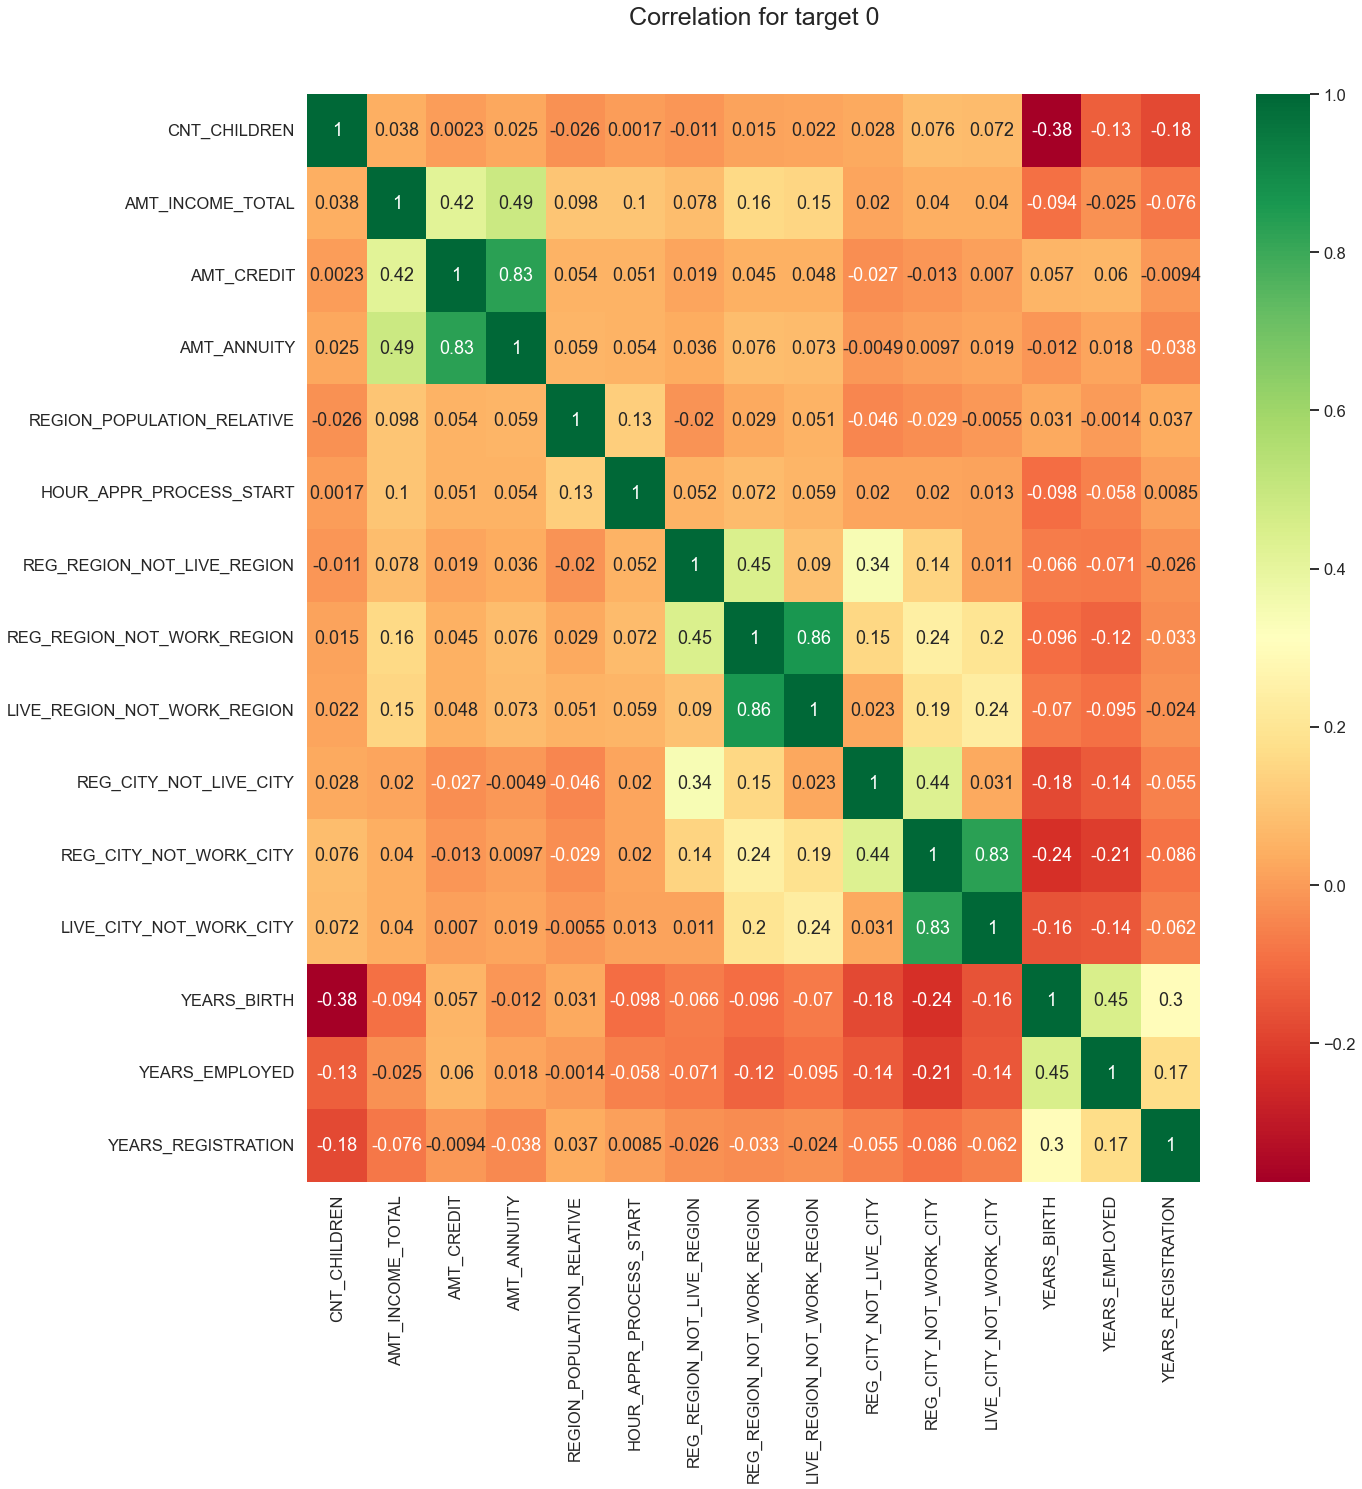

In [85]:
# For Target 0

target_corr(data=target0,title='Correlation for target 0')

In [92]:
### top 10 corelation in target 0


target0.corr().abs().unstack().sort_values()
correlation0 = target0.corr().abs().unstack().sort_values().dropna()

correlation0 = correlation0[correlation0 != 1.0]
correlation0.tail(20)





YEARS_REGISTRATION           YEARS_BIRTH                    0.578713
YEARS_BIRTH                  YEARS_REGISTRATION             0.578713
                             REG_CITY_NOT_WORK_CITY         0.582537
REG_CITY_NOT_WORK_CITY       YEARS_BIRTH                    0.582537
YEARS_EMPLOYED               REG_CITY_NOT_WORK_CITY         0.594758
REG_CITY_NOT_WORK_CITY       YEARS_EMPLOYED                 0.594758
AMT_INCOME_TOTAL             AMT_CREDIT                     0.663958
AMT_CREDIT                   AMT_INCOME_TOTAL               0.663958
CNT_CHILDREN                 YEARS_BIRTH                    0.674839
YEARS_BIRTH                  CNT_CHILDREN                   0.674839
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.726077
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.726077
YEARS_BIRTH                  YEARS_EMPLOYED                 0.763942
YEARS_EMPLOYED               YEARS_BIRTH                    0.763942
LIVE_CITY_NOT_WORK_CITY      REG_C

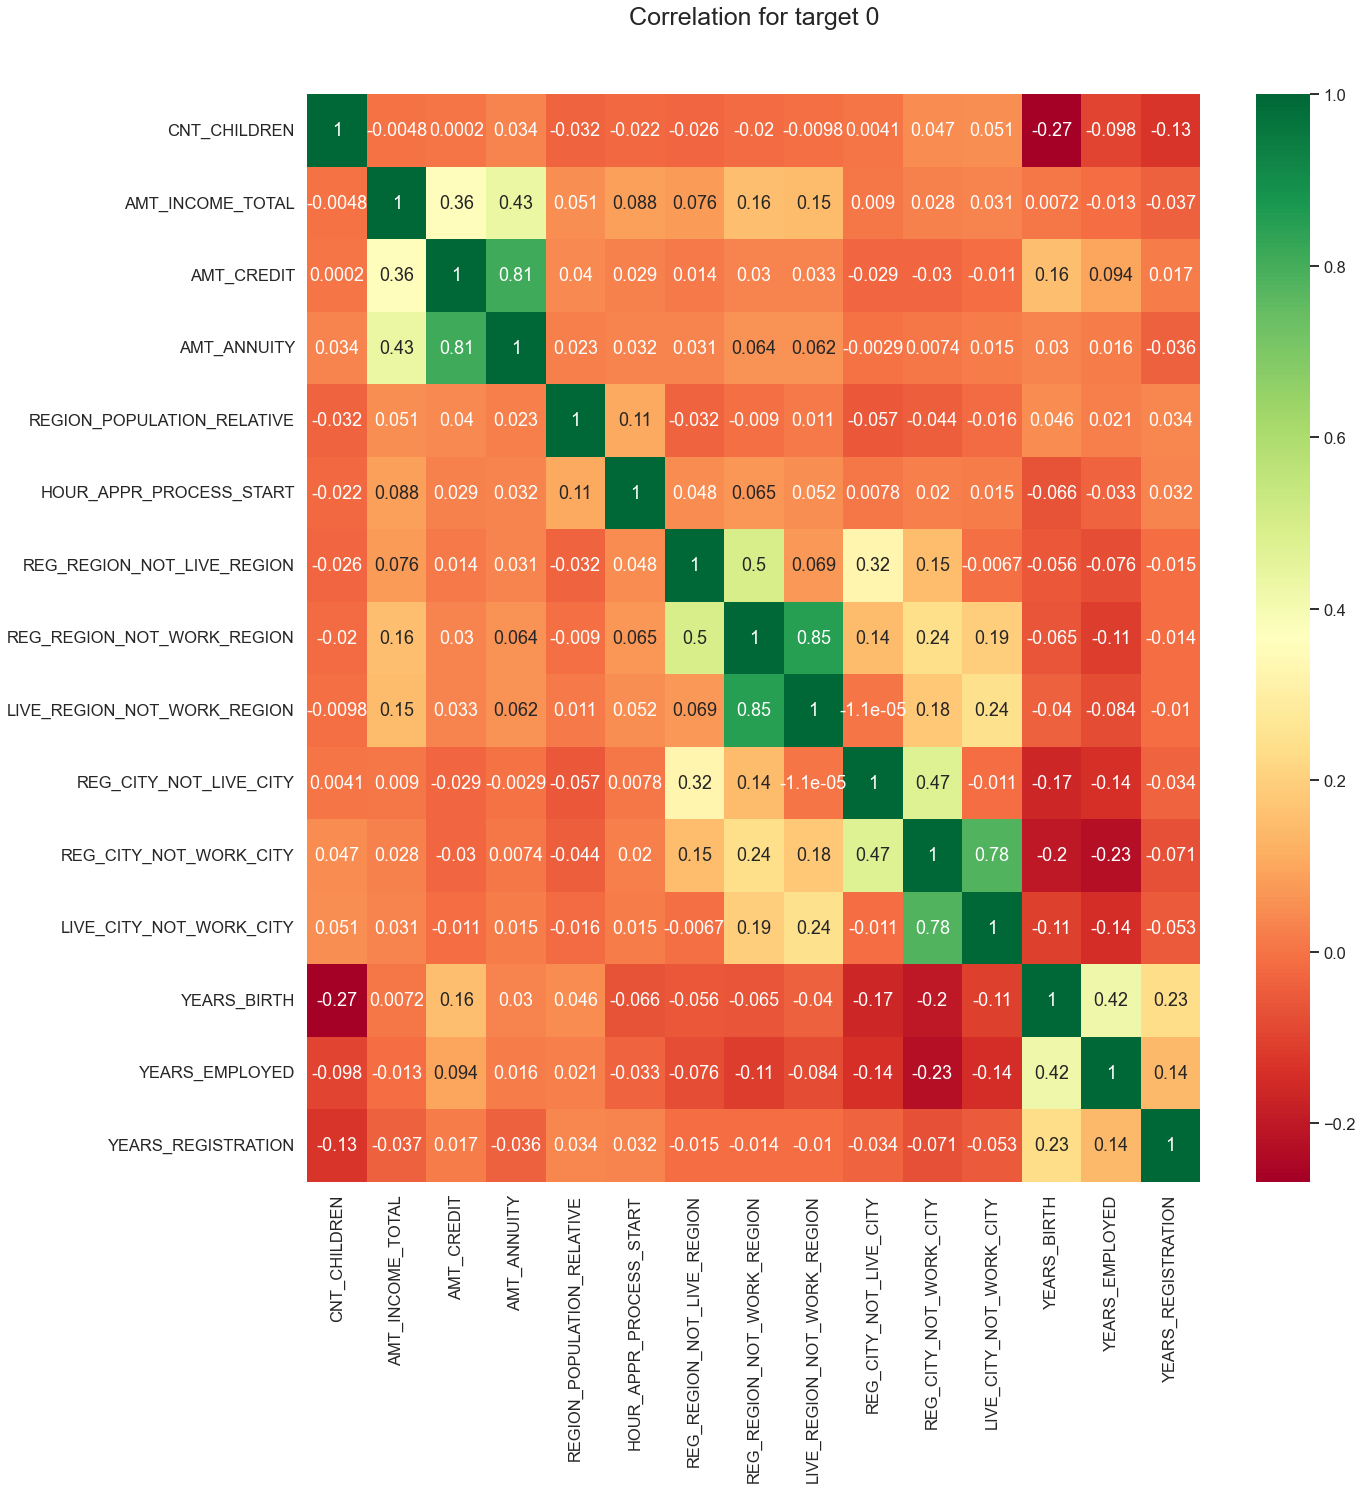

In [96]:
# For Target 1

target_corr(data=target1,title='Correlation for target 0')

In [97]:
### top 10 corelation in target 1
target1.corr().abs().unstack().sort_values()
correlation1 = target1.corr().abs().unstack().sort_values().dropna()

correlation1 = correlation1[correlation1 != 1.0]
correlation1.tail(20)




AMT_CREDIT                   AMT_INCOME_TOTAL               0.577639
AMT_INCOME_TOTAL             AMT_CREDIT                     0.577639
REG_CITY_NOT_WORK_CITY       YEARS_BIRTH                    0.578759
YEARS_BIRTH                  REG_CITY_NOT_WORK_CITY         0.578759
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.581318
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.581318
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.589918
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY         0.589918
                             YEARS_EMPLOYED                 0.616649
YEARS_EMPLOYED               REG_CITY_NOT_WORK_CITY         0.616649
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.653756
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.653756
YEARS_BIRTH                  YEARS_EMPLOYED                 0.726076
YEARS_EMPLOYED               YEARS_BIRTH                    0.726076
REG_CITY_NOT_WORK_CITY       LIVE_

#As we can see from above correlation heatmap, There are number of observation we can point out

Credit amount has negative correlation with cnt children, which means Credit amount is higher for less  children.

Income amount has negative correlation cnt children , means more income for less children 

less children client have in densely populated area.

amount og credit  is positively correlated with region population relative means Credit amount is higher to densely populated area.

amt income total  is positively correlated with region population relative means The income is also higher in densely populated area.

 amt of income is positively correlate with reg region not live region, means income is from the region where the customer dont live
 
 years of birth is positively correlated with amt of income means high the age group has high income

The above graph for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa


### bivariate analysis

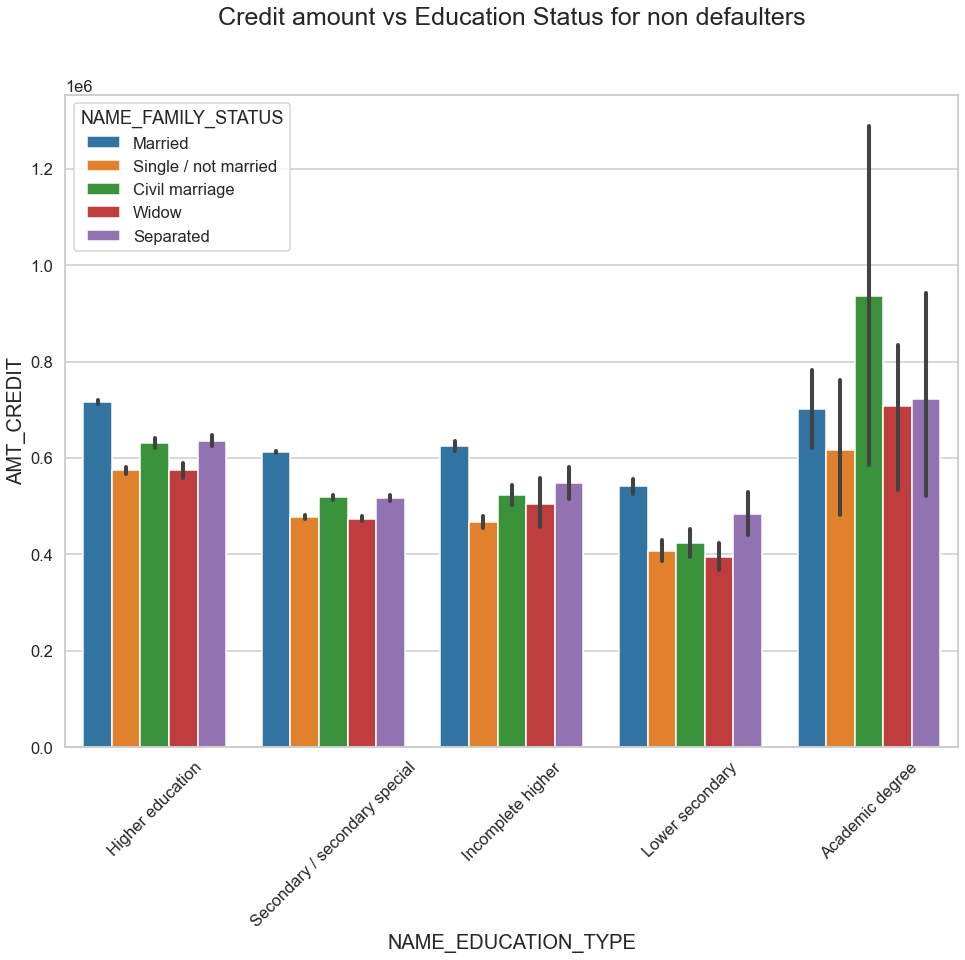

In [101]:
# Box plotting for Credit amount and education type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for non defaulters')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.
also academemic degree customers have lass outliers assuming they are prving with uniform rate of credits


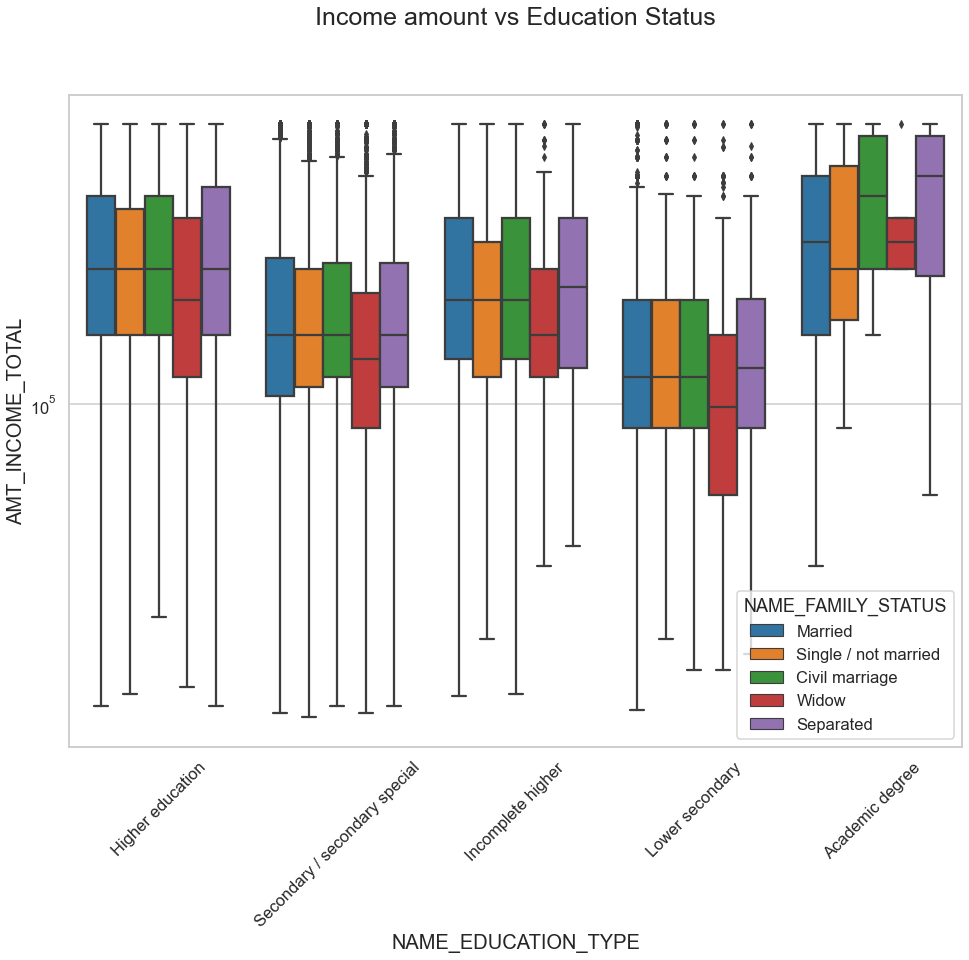

In [102]:
# Box plotting for Income amount and education  in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

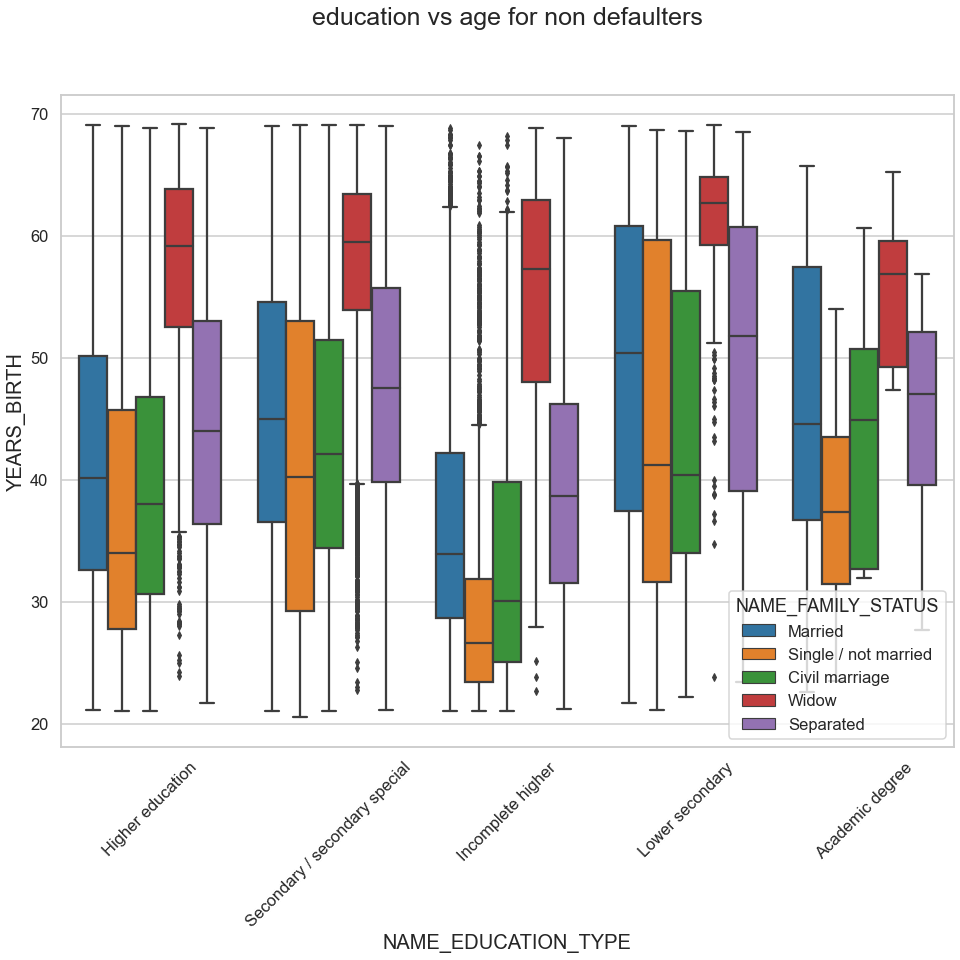

In [106]:
#  plotting for Income amount anb age in logarithmic scale


plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='YEARS_BIRTH', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('education vs age for non defaulters')


plt.show()

# For Target 1

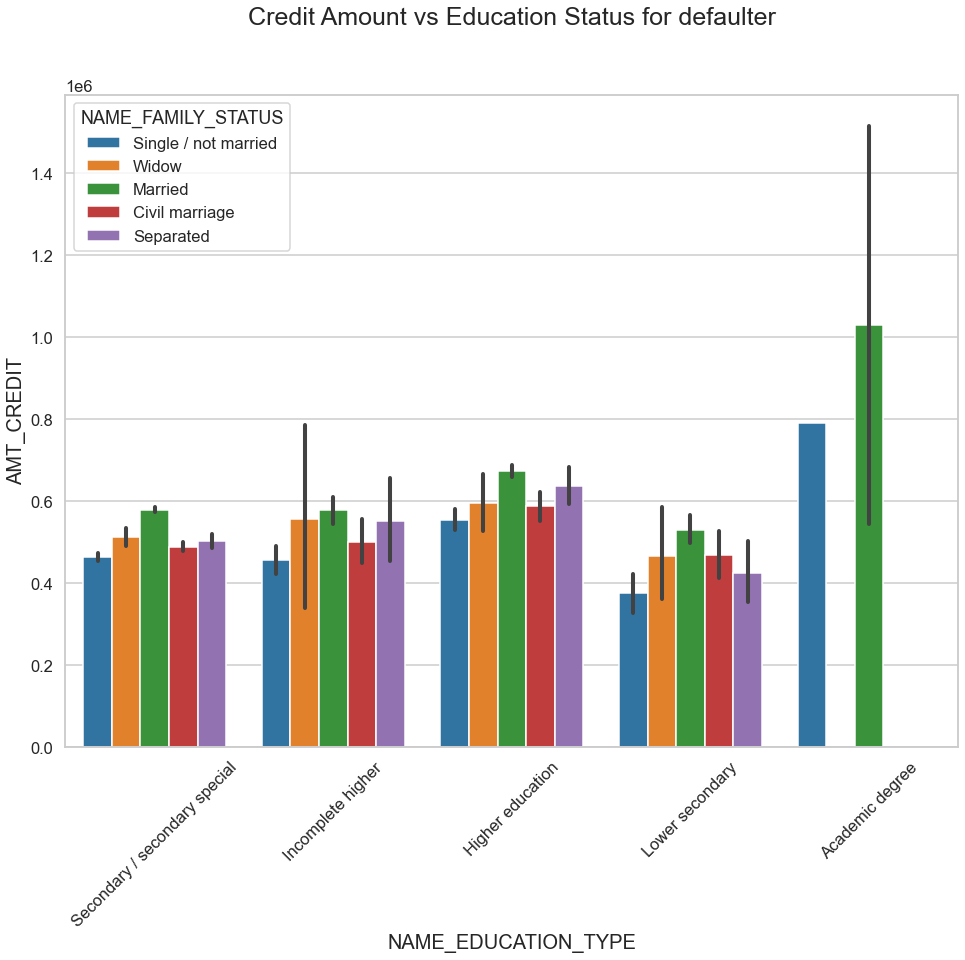

In [100]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.barplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status for defaulter')
plt.show()

Quite similar with Target 0 From the above box plot we can say that Family status of 'sigle',  and 'separated' of Academic degree education are having higher number of credits than others and have difficulties in payment. Civil marriage for Academic degree is having most of the credits 

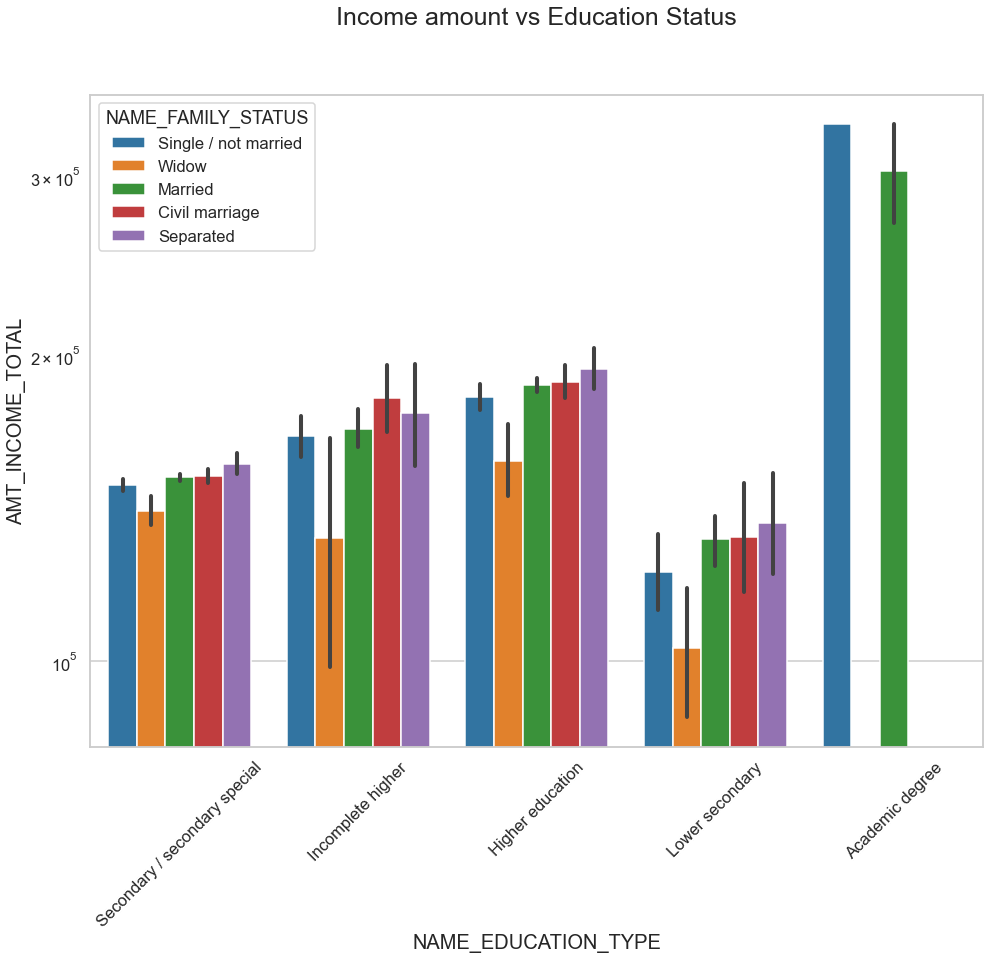

In [104]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. acadimic has high income compared to the income type higher education. there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

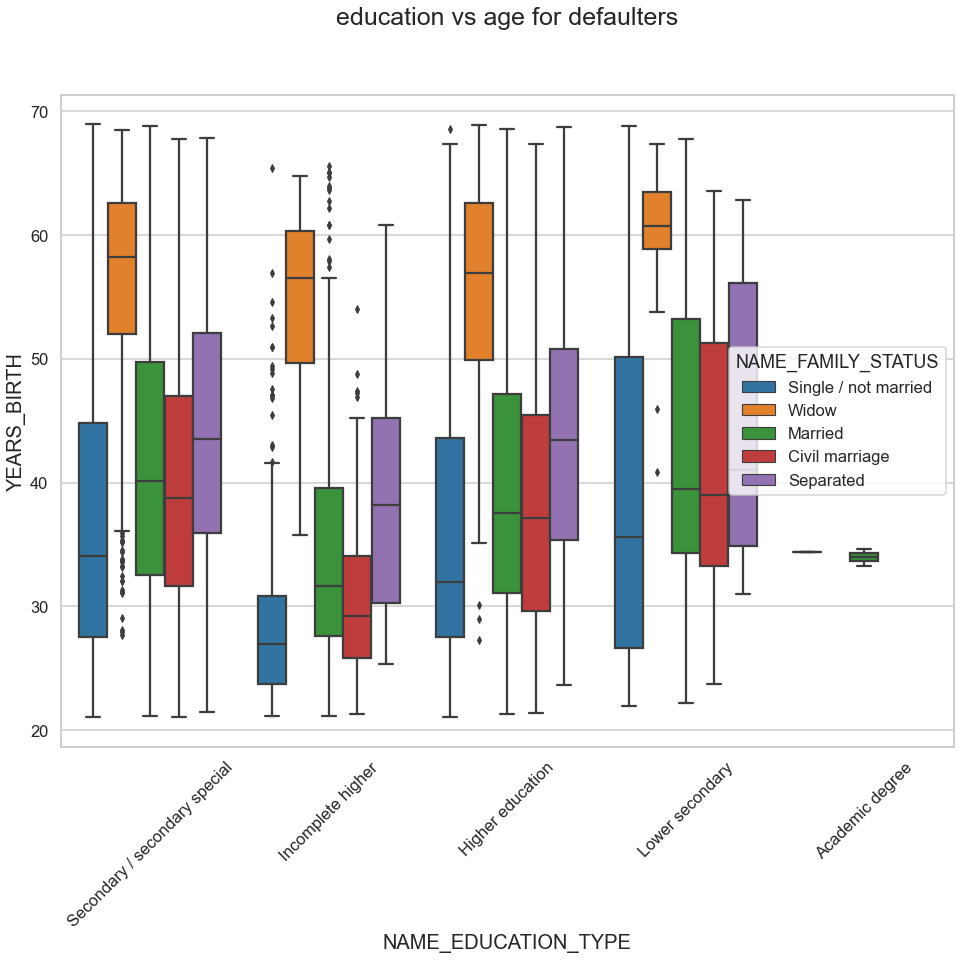

In [107]:
#  plotting for  education adb age in logarithmic scale


plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='YEARS_BIRTH', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('education vs age for defaulters')


plt.show()

##we can see from the above plot that widows are mostly from higher age group and tends to default as compared to the people who dont tend to default.

In [108]:
## reading the past application
past_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [109]:
past_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [110]:
# listing the null values columns having more than 30%

null=past_application.isnull().sum()/len(null)*100
col_to_drop=null[null>35].keys()
len(col_to_drop)
# Removing those 15 columns

15

In [111]:
# Cleaning the missing data

past_application.drop(col_to_drop,axis=1,inplace=True)

past_application.shape

(1670214, 22)

In [112]:
past_application.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
NAME_YIELD_GROUP                     5
dtype: int64

In [113]:
numerical1=["AMT_APPLICATION","AMT_CREDIT","DAYS_DECISION","SELLERPLACE_AREA"]
categorical1=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY",
              "NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY",
             "NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP"]
                                                                      
                  
                   
                
                     
                  


In [114]:
for i in categorical1:
    print(past_application[i].value_counts())
    

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
11    192728
12    185980
10    181690
13    172256
14    157711
15    142965
9     127002
16    121361
17     95064
8      73085
18     64156
7      45646
19     34089
6      25759
5      15392
20     14535
4       9319
3       5035
21      4082
2       1116
22       720
1        212
23       202
0        109
Name: HOUR_APPR_PROCESS_START, dtype: int64
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608

In [115]:
for i in categorical1:
    print(past_application[i].value_counts(normalize = True))
    

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
11    0.115391
12    0.111351
10    0.108782
13    0.103134
14    0.094426
15    0.085597
9     0.076039
16    0.072662
17    0.056917
8     0.043758
18    0.038412
7     0.027329
19    0.020410
6     0.015423
5     0.009216
20    0.008702
4     0.005580
3     0.003015
21    0.002444
2     0.000668
22    0.000431
1     0.000127
23    0.000121
0     0.000065
Name: HOUR_APPR_PROCESS_START, dtype: float64
Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
1    0.996468
0    0.003532
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64
XAP                                 0.552421
XNA                                 0.4058

In [116]:
# Removing the column values of 'XNA' and 'XAP'

past_application=past_application.drop(past_application[past_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

past_application=past_application.drop(past_application[past_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

past_application.shape

(69635, 22)

In [117]:
# Now merging the Application dataset with past appliaction dataset

merged_application=pd.merge(left=new_application,right=past_application,how='inner',on='SK_ID_CURR',suffixes='_x')

In [118]:
merged_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            0   
1      100035       0          Cash loans           F            0   
2      100039       0          Cash loans           M            1   
3      100046       0     Revolving loans           M            1   
4      100046       0     Revolving loans           M            1   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY  \
0               1             0           90000.0     180000.0       9000.0   
1               1             0          292500.0     665892.0      24592.5   
2               0             1          337500.0     733315.5      39069.0   
3               1             0          180000.0     540000.0      27000.0   
4               1             0          180000.0     540000.0      27000.0   

   ...      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  ...  Cash through the bank                XAP              New   
1  ...  Cash through the bank                 HC         Repeater   
2  ...  Cash through the bank                XAP        Refreshed   
3  ...  Cash through the bank                XAP              New   
4  ...  Cash through the bank              LIMIT         Repeater   

  NAME_GOODS_CATEGORY  NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                 XNA            Cash           walk-in   
1                 XNA            Cash           walk-in   
2                 XNA            Cash           walk-in   
3                 XNA            Cash           walk-in   
4                 XNA            Cash           walk-in   

                 CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0     Credit and cash offices                -1                   XNA   
1     Credit and cash offices                -1                   XNA   
2  Channel of corporate sales                -1                   XNA   
3     Credit and cash offices                -1                   XNA   
4     Credit and cash offices                -1                   XNA   

   NAME_YIELD_GROUP  
0              high  
1        low_action  
2        low_normal  
3        low_normal  
4        low_normal  

[5 rows x 51 columns]

In [119]:
merged_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE_          59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  object  
 5   FLAG_OWN_REALTY              59413 non-null  object  
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT_                  59413 non-null  float64 
 9   AMT_ANNUITY                  59413 non-null  float64 
 10  NAME_INCOME_TYPE             59413 non-null  object  
 11  NAME_EDUCATION_TYPE          59413 non-null  object  
 12  NAME_FAMILY_STATUS           59413 non-null  object  
 13  N

In [120]:
#renaming the colums in merged data frame
merged_application = merged_application.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [121]:
# Removing unwanted columns for analysis

merged_application.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [122]:
merged_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TARGET                      59413 non-null  int64   
 1   NAME_CONTRACT_TYPE          59413 non-null  object  
 2   CODE_GENDER                 59413 non-null  object  
 3   FLAG_OWN_CAR                59413 non-null  object  
 4   FLAG_OWN_REALTY             59413 non-null  object  
 5   CNT_CHILDREN                59413 non-null  int64   
 6   AMT_INCOME_TOTAL            59413 non-null  float64 
 7   AMT_CREDIT                  59413 non-null  float64 
 8   AMT_ANNUITY                 59413 non-null  float64 
 9   NAME_INCOME_TYPE            59413 non-null  object  
 10  NAME_EDUCATION_TYPE         59413 non-null  object  
 11  NAME_FAMILY_STATUS          59413 non-null  object  
 12  NAME_HOUSING_TYPE           59413 non-null  object  
 13  REGION_POPULATIO

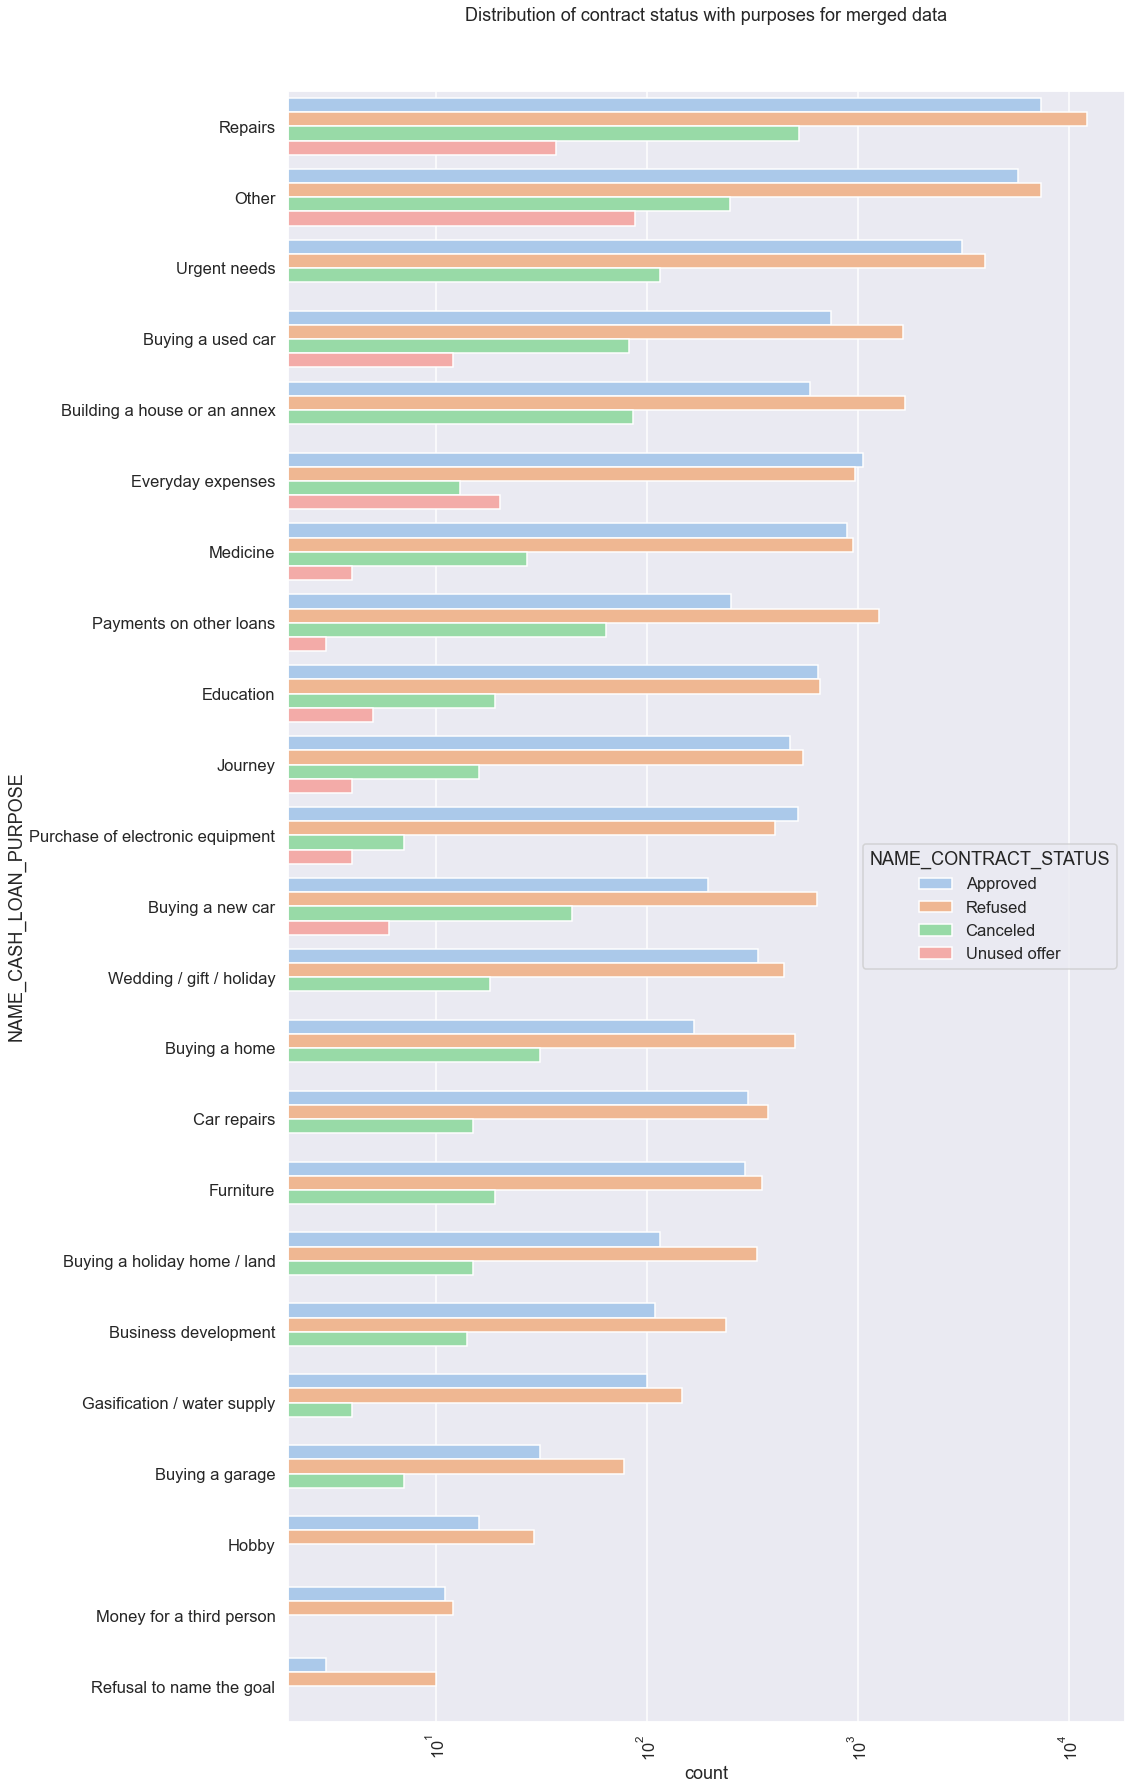

In [125]:
# Distribution of contract status in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes for merged data')
ax = sns.countplot(data = merged_application, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel') 

Points to be concluded from above plot:

#Most rejection of loans came from purpose 'repairs'.
#For education we have equal number of approves and refusal
#Payign other loans and buying a new car is having significant higher rejection than approves.
#for hobbies mostly loan is refused
#money given for third party is acceepted more than refusal
#loan is rejected for customer who wants to buy a loan
#for businees develovment the sanction is mostly refused
#is case of everyday expense it is mostly accepted


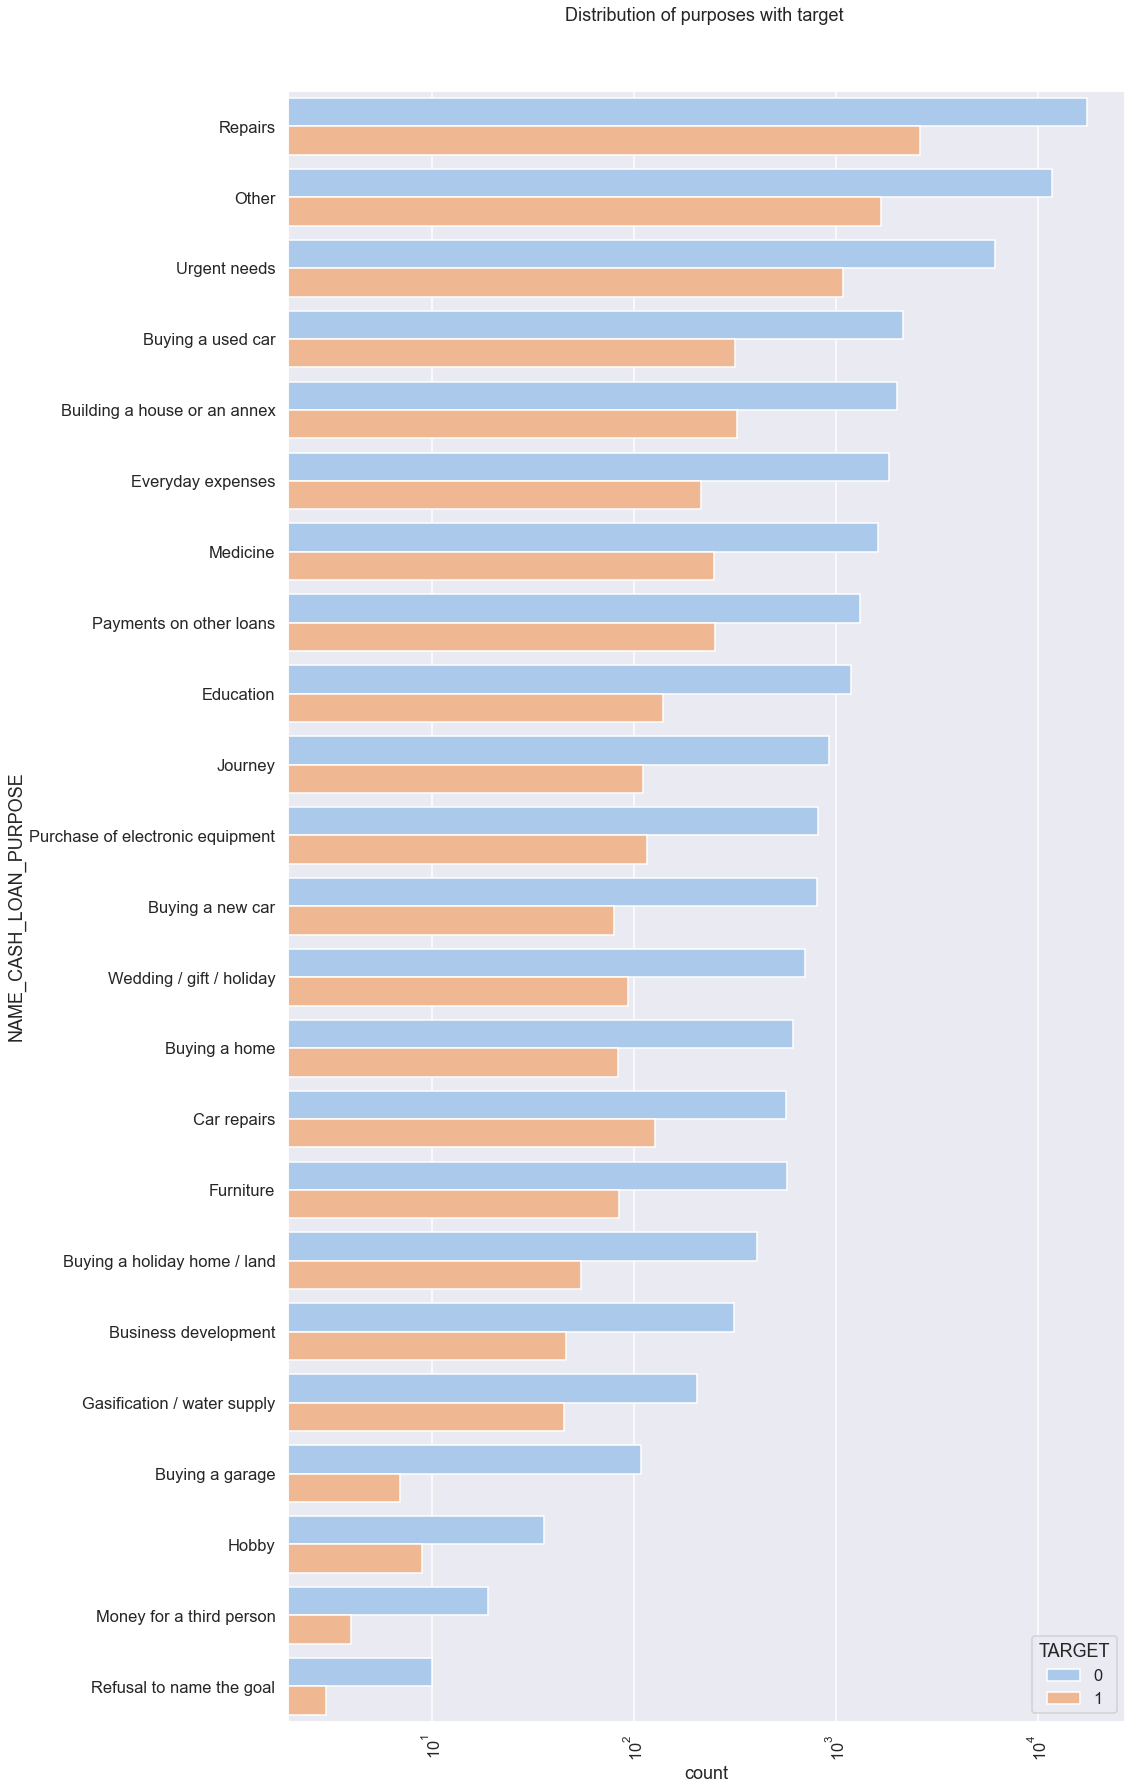

In [264]:
# Distribution of contract status

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data = merged_application, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')
plt.show()

Few points we can conclude from abpve plot:

Loan purposes with 'Repairs' are facing more difficulites in payment on time.
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.


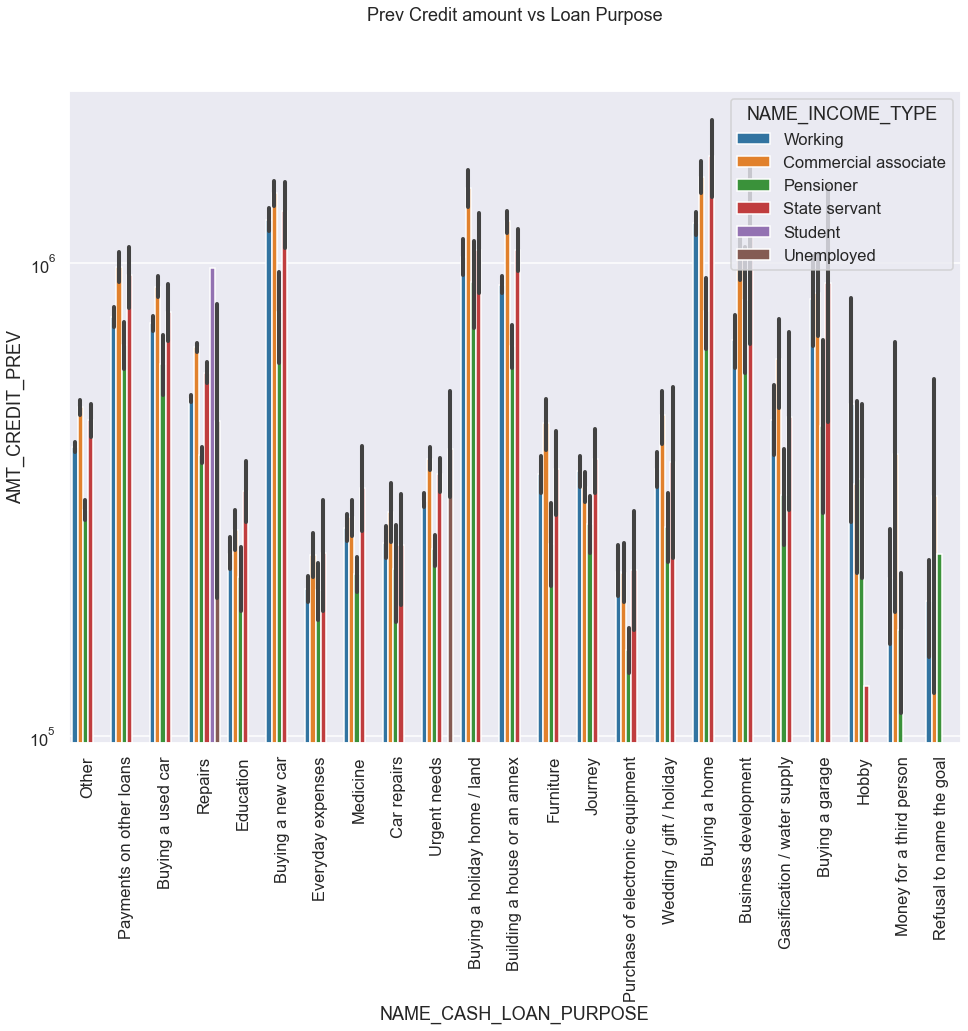

In [266]:
# Box plotting for Credit amount and loan purpose in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =merged_application, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
Income type of state servants have a significant amount of credit applied
Money for third person or a Hobby is having less credits applied for.

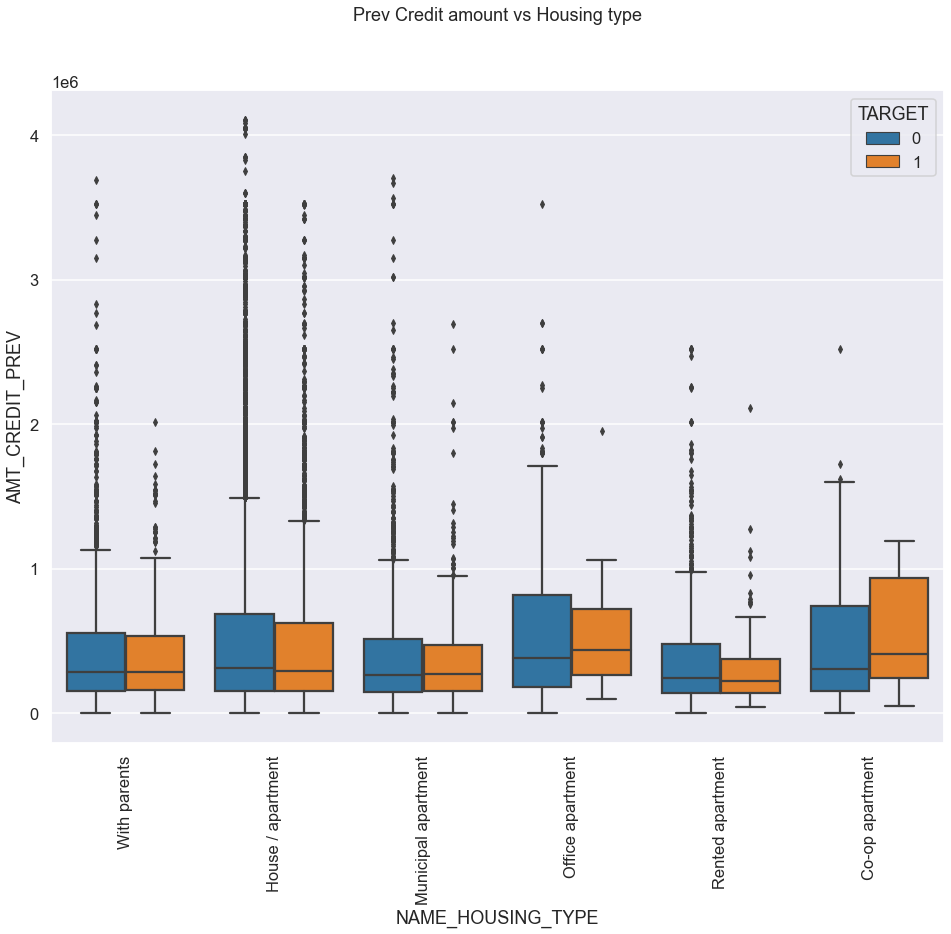

In [267]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(data =merged_application, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

#### CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.
5. higher aged widows are mostly tending to default 